# Capstone Two - Online Retail Analysis

The purpose of this analysis is to determine the current state of this fictional company, as well as determine any future risks and ways to increase revenue going forward.
<br>
<br>
The company is an online retailer based in the United Kingdom that sells mainly to wholesaler businesses. We will assume their transactions are conducted in English Pounds.
<br>
<br>
Unfortunately, the dataset only contains sales data, so revenue is the only financial metric to work with. As a result, we will not consider costs of goods sold when analyzing the state of the company.

## Libraries Required

In [2]:
# import Python libraries to complete analysis

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

- NumPy if we need potential array calculations
- Pandas for the dataframe manipulation legwork
- Matplotlib and Seaborn for visualizations

## Import Dataset

In [3]:
# import dataset into notebook

df = pd.read_csv('Documents\Springboard\Capstone Two\online_retail_II.csv')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Subtotal,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,83.4,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,81.0,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,81.0,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,100.8,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,30.0,13085.0,United Kingdom


In [4]:
# get initial dataset shape

df.shape

(1048575, 9)

Raw dataframe has over a million rows with nine categories.

## Data Cleansing

In [5]:
# Check for what datatypes we are working with

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1048575 non-null  object 
 1   StockCode    1048575 non-null  object 
 2   Description  1044203 non-null  object 
 3   Quantity     1048575 non-null  int64  
 4   InvoiceDate  1048575 non-null  object 
 5   Price        1048575 non-null  float64
 6   Subtotal     1048575 non-null  float64
 7   Customer ID  811893 non-null   float64
 8   Country      1048575 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 72.0+ MB


<ul> It looks like we're going to need to change the following: <br><br>
    <li>  Invoice: object -> integer </li>
    <li>  InvoiceDate: object -> datetime </li>
    <li>  Customer ID: float -> integer </li>
</ul>
<br>
There's also some inconsistencies in the rows when it comes to the contents. Customer ID in particular has a lot of missing values that we're going to have to drop.
<br>
<br>
As all cleaning can be done in single lines of code, there is no reason to create a function for this activity, even if the code seems repetitive.

In [6]:
# Drop refund and adjustment invoices from Invoice list. They are designated with a C and A in the number code, respectively.

df = df[~df['Invoice'].str.contains('C')]
df = df[~df['Invoice'].str.contains('A')]
df.shape

(1029308, 9)

In [7]:
# Convert Invoice from Object to Integer

df['Invoice'] = df['Invoice'].astype('int64')
df['Invoice'].head()

0    489434
1    489434
2    489434
3    489434
4    489434
Name: Invoice, dtype: int64

In [8]:
# Convert InvoiceDate to Datetime

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['InvoiceDate'].head()

0   2009-12-01 07:45:00
1   2009-12-01 07:45:00
2   2009-12-01 07:45:00
3   2009-12-01 07:45:00
4   2009-12-01 07:45:00
Name: InvoiceDate, dtype: datetime64[ns]

In [9]:
# Drop missing values to convert Customer ID to an integer.

df = df.dropna()
df.shape

(793380, 9)

In [10]:
# Amount of rows cut down to < 800,000. Can now convert to int.

df['Customer ID'] = df['Customer ID'].astype('int64')
df['Customer ID'].head()

0    13085
1    13085
2    13085
3    13085
4    13085
Name: Customer ID, dtype: int64

In [11]:
# Drop various designations and adjustments from the StockCode column that indicate unrelated conventional products.

df = df[~df['StockCode'].str.contains('DOT')]
df = df[~df['StockCode'].str.contains('POST')]
df = df[~df['StockCode'].str.contains('gift')]
df = df[~df['StockCode'].str.contains('PADS')]
df = df[~df['StockCode'].str.contains('ADJUST')]
df.shape

(791512, 9)

In [12]:
# Drop manual from description.


df = df[~df['Description'].str.contains('Manual')]
df.shape

(790802, 9)

The Manual description indicates manual adjustments to customers, and do not factor into our analysis.

In [13]:
# Drop Unspecified and European Community from Country column, as they do not specify a location that we can use to make insights.
# We will be keeping the West Indies category as there is no specific country in that region.


df = df[~df['Country'].str.contains('Unspecified')]
df = df[~df['Country'].str.contains('European Community')]

df.shape

(790224, 9)

In [14]:
# Create year and month columns

df['Year'] = pd.DatetimeIndex(df['InvoiceDate']).year
df['Month'] = pd.DatetimeIndex(df['InvoiceDate']).month
df['month_year'] = pd.to_datetime(df['InvoiceDate']).dt.to_period('M')
df['month_year'] = df['month_year'].astype('string')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Subtotal,Customer ID,Country,Year,Month,month_year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,83.4,13085,United Kingdom,2009,12,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,81.0,13085,United Kingdom,2009,12,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,81.0,13085,United Kingdom,2009,12,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,100.8,13085,United Kingdom,2009,12,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,30.0,13085,United Kingdom,2009,12,2009-12


Year and month columns created in order to provide better aggregation.

In [15]:
# Save cleaned dataset for visualization software usage

df.to_csv('retail_clean.csv')

## Analysis - Issues / Hypotheses to Explore

### Which customers generate the most revenue?


In [16]:
# Total revenue 12/2009 - 12/2011
df['Subtotal'].sum()

17024227.35

Total revenue of £17,024,227 

In [17]:
# Define aggregation functions to streamline code

def df_add(dataframe, group, metric):
    df_temp = dataframe.groupby(group)[metric].sum()
    df_temp_sorted = df_temp.sort_values(ascending = False)
    print(df_temp_sorted.head(10))

def df_add_two(dataframe, group_1, group_2, metric):
    df_temp = dataframe.groupby([group_1, group_2])[metric].sum()
    df_temp_sorted = df_temp.sort_values(ascending = False)
    print(df_temp_sorted.head(10))
    
def df_add_three(dataframe, group_1, group_2, group_3, metric):
    df_temp = dataframe.groupby([group_1, group_2, group_3])[metric].sum()
    df_temp_sorted = df_temp.sort_values(ascending = False)
    print(df_temp_sorted.head(10))

These groupby and sorting functions are continuously repeated when gathering revenue metrics. Defining them now uses less code.

In [180]:
# Find the top ten overall customers by revenue 12/2009 - 12/2011

df_add_two(df, 'Customer ID', 'Country', 'Subtotal')

Customer ID  Country       
18102        United Kingdom    597336.11
14646        Netherlands       515023.50
14156        EIRE              305228.63
14911        EIRE              277742.64
17450        United Kingdom    246973.09
13694        United Kingdom    193351.65
17511        United Kingdom    168224.23
12415        Australia         144033.37
16684        United Kingdom    141740.79
15061        United Kingdom    133921.21
Name: Subtotal, dtype: float64


United Kingdom comprises six of the top ten customers at this company. Two Irish customers are in the top five by revenue.

In [19]:
# Find the top countries by revenue 12/2009 - 12/2011

df_add(df, 'Country', 'Subtotal')

df_sub_geo = df.groupby(['Country'])['Subtotal'].sum()
df_sub_geo_sort = df_sub_geo.sort_values(ascending = False)


Country
United Kingdom    1.424821e+07
EIRE              5.943747e+05
Netherlands       5.382246e+05
Germany           3.824425e+05
France            3.114134e+05
Australia         1.684847e+05
Spain             9.832458e+04
Switzerland       9.362434e+04
Sweden            8.584104e+04
Denmark           6.840929e+04
Name: Subtotal, dtype: float64


In [20]:
np.divide(144033.37, 1.684847e+05) * 100

85.48750717424193

United Kingdom spends the most money at this company by a distance. Nine out of the top ten countries by revenue are located in Europe.

Looking at the last two tables, Australia is the only non-european country within the top ten countries by revenue. As we can see in the top table, the revenue from Australia is concentrated in one whale customer, who comprises ~85.49% of the total revenue.

In [21]:
# Overall product 

df_add_two(df, 'StockCode', 'Description', 'Subtotal')

StockCode  Description                       
22423      REGENCY CAKESTAND 3 TIER              282435.22
85123A     WHITE HANGING HEART T-LIGHT HOLDER    250492.57
85099B     JUMBO BAG RED RETROSPOT               136139.64
84879      ASSORTED COLOUR BIRD ORNAMENT         126015.29
47566      PARTY BUNTING                         103627.78
23166      MEDIUM CERAMIC TOP STORAGE JAR         81243.22
22086      PAPER CHAIN KIT 50'S CHRISTMAS         76906.96
79321      CHILLI LIGHTS                          71631.82
85099F     JUMBO BAG STRAWBERRY                   64522.61
21137      BLACK RECORD COVER FRAME               62451.39
Name: Subtotal, dtype: float64


In [182]:
# Most expensive individual items

df_temp = df[['Description', 'Price', 'Quantity']]
temp_sort = df_temp.groupby(['Description'])['Price'].max().sort_values(ascending = False)
temp_head = temp_sort.head(10)
print(temp_head)

Description
PICNIC BASKET WICKER 60 PIECES        649.50
VINTAGE RED KITCHEN CABINET           295.00
VINTAGE BLUE KITCHEN CABINET          295.00
LOVE SEAT ANTIQUE WHITE METAL         195.00
RUSTIC  SEVENTEEN DRAWER SIDEBOARD    165.00
GIANT SEVENTEEN DRAWER SIDEBOARD      165.00
REGENCY MIRROR WITH SHUTTERS          165.00
CARRIAGE                              150.00
BLUE KASHMIRI COFFEE TABLE            129.95
CHEST NATURAL WOOD 20 DRAWERS         125.00
Name: Price, dtype: float64


The most expensive item sold at the company costs £649.50. This seems consistent with an online retailer that specializes in wholesaler purchases.

### Top Country Breakdown

#### United Kingdom

In [24]:
# Dig into UK product habits 2009-2011

df_uk = df[df['Country'] == 'United Kingdom']
df_add_two(df_uk, 'StockCode', 'Description', 'Subtotal')

StockCode  Description                       
22423      REGENCY CAKESTAND 3 TIER              231590.62
85123A     WHITE HANGING HEART T-LIGHT HOLDER    231559.52
85099B     JUMBO BAG RED RETROSPOT               123965.83
84879      ASSORTED COLOUR BIRD ORNAMENT         117144.94
47566      PARTY BUNTING                          94900.93
23166      MEDIUM CERAMIC TOP STORAGE JAR         80167.85
22086      PAPER CHAIN KIT 50'S CHRISTMAS         73838.31
79321      CHILLI LIGHTS                          70523.92
85099F     JUMBO BAG STRAWBERRY                   60800.54
21137      BLACK RECORD COVER FRAME               60668.82
Name: Subtotal, dtype: float64


In [25]:
df_add_two(df_uk, 'StockCode', 'Description', 'Quantity')

StockCode  Description                       
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS     99699
85123A     WHITE HANGING HEART T-LIGHT HOLDER    85850
23166      MEDIUM CERAMIC TOP STORAGE JAR        76804
84879      ASSORTED COLOUR BIRD ORNAMENT         73606
17003      BROCADE RING PURSE                    70524
85099B     JUMBO BAG RED RETROSPOT               68643
21977      PACK OF 60 PINK PAISLEY CAKE CASES    45282
84991      60 TEATIME FAIRY CAKE CASES           40655
22197      SMALL POPCORN HOLDER                  40001
15036      ASSORTED COLOURS SILK FAN             36602
Name: Quantity, dtype: int64


In [26]:
# UK revenue over time

df_uk.groupby('Year')['Subtotal'].sum()

Year
2009    6.118027e+05
2010    7.245171e+06
2011    6.391239e+06
Name: Subtotal, dtype: float64

In [27]:
df_uk.groupby('Month')['Subtotal'].sum()

Month
1      848211.75
2      766242.98
3     1044277.51
4      909780.56
5     1046286.21
6     1061960.81
7      988283.84
8     1001266.88
9     1456537.78
10    1687713.85
11    1956445.18
12    1481205.56
Name: Subtotal, dtype: float64

In [28]:
df_uk.groupby(['Month', 'Year'])['Subtotal'].sum()

Month  Year
1      2010    406116.09
       2011    442095.66
2      2010    410691.99
       2011    355550.99
3      2010    577375.99
       2011    466901.52
4      2010    502884.98
       2011    406895.58
5      2010    503244.65
       2011    543041.56
6      2010    537818.46
       2011    524142.35
7      2010    503944.08
       2011    484339.76
8      2010    505924.22
       2011    495342.66
9      2010    664951.58
       2011    791586.20
10     2010    872380.80
       2011    815333.05
11     2010    982937.77
       2011    973507.41
12     2009    611802.71
       2010    776900.22
       2011     92502.63
Name: Subtotal, dtype: float64

#### Ireland

In [29]:
# Ireland product habits
df_ire = df[df['Country'] == 'EIRE']
df_add_two(df_ire, 'StockCode', 'Description', 'Subtotal')

StockCode  Description                       
22423      REGENCY CAKESTAND 3 TIER              14891.85
C2         CARRIAGE                               9075.00
20914      SET/5 RED SPOTTY LID GLASS BOWLS       5652.60
21166      COOK WITH WINE METAL SIGN              5470.88
85123A     WHITE HANGING HEART T-LIGHT HOLDER     4494.90
21181      PLEASE ONE PERSON METAL SIGN           4334.40
22838      3 TIER CAKE TIN RED AND CREAM          4265.55
21169      YOU'RE CONFUSING ME METAL SIGN         4140.96
21843      RED RETROSPOT CAKE STAND               3657.30
21908      CHOCOLATE THIS WAY METAL SIGN          3575.40
Name: Subtotal, dtype: float64


In [30]:
df_add_two(df_ire, 'StockCode', 'Description', 'Quantity')

StockCode  Description                       
84991      60 TEATIME FAIRY CAKE CASES           5364
17084R     ASSORTED INCENSE PACK                 4320
84992      72 SWEETHEART FAIRY CAKE CASES        4008
21212      PACK OF 72 RETRO SPOT CAKE CASES      3912
21977      PACK OF 60 PINK PAISLEY CAKE CASES    3732
21975      PACK OF 60 DINOSAUR CAKE CASES        3240
21166      COOK WITH WINE METAL SIGN             3062
21169      YOU'RE CONFUSING ME METAL SIGN        2832
71459      HANGING JAM JAR T-LIGHT HOLDER        2520
22197      SMALL POPCORN HOLDER                  2436
Name: Quantity, dtype: int64


In [31]:
# Ireland revenue over time

df_ire.groupby('Year')['Subtotal'].sum()

Year
2009     17367.21
2010    329951.76
2011    247055.71
Name: Subtotal, dtype: float64

In [32]:
df_ire.groupby('Month')['Subtotal'].sum()

Month
1     80723.67
2     29359.38
3     40378.32
4     27866.73
5     34160.76
6     42685.20
7     72892.38
8     39886.74
9     76623.62
10    61014.92
11    57191.14
12    31591.82
Name: Subtotal, dtype: float64

In [33]:
df_ire.groupby(['Month', 'Year'])['Subtotal'].sum()

Month  Year
1      2010    58819.48
       2011    21904.19
2      2010    19232.86
       2011    10126.52
3      2010    22078.30
       2011    18300.02
4      2010    20296.23
       2011     7570.50
5      2010    18178.57
       2011    15982.19
6      2010    22849.21
       2011    19835.99
7      2010    31987.23
       2011    40905.15
8      2010    22919.36
       2011    16967.38
9      2010    35628.13
       2011    40995.49
10     2010    36697.00
       2011    24317.92
11     2010    27717.73
       2011    29473.41
12     2009    17367.21
       2010    13547.66
       2011      676.95
Name: Subtotal, dtype: float64

#### Netherlands

In [34]:
# Netherlands product habits

df_ned = df[df['Country'] == 'Netherlands']
df_add_two(df_ned, 'StockCode', 'Description', 'Subtotal')

StockCode  Description                        
22326      ROUND SNACK BOXES SET OF4 WOODLAND     13070.30
85123A     WHITE HANGING HEART T-LIGHT HOLDER     10932.50
22630      DOLLY GIRL LUNCH BOX                   10797.90
22629      SPACEBOY LUNCH BOX                     10696.20
21731      RED TOADSTOOL LED NIGHT LIGHT           8933.70
22328      ROUND SNACK BOXES SET OF 4 FRUITS       7560.80
23084      RABBIT NIGHT LIGHT                      6990.88
22423      REGENCY CAKESTAND 3 TIER                6520.65
20712      JUMBO BAG WOODLAND ANIMALS              5657.50
85099B     JUMBO BAG RED RETROSPOT                 5613.00
Name: Subtotal, dtype: float64


In [35]:
df_add_two(df_ned, 'StockCode', 'Description', 'Quantity')

StockCode  Description                        
35961      FOLKART ZINC HEART CHRISTMAS DEC       6697
22630      DOLLY GIRL LUNCH BOX                   6586
22629      SPACEBOY LUNCH BOX                     6460
21731      RED TOADSTOOL LED NIGHT LIGHT          6130
22326      ROUND SNACK BOXES SET OF4 WOODLAND     5114
21212      PACK OF 72 RETROSPOT CAKE CASES        4608
85123A     WHITE HANGING HEART T-LIGHT HOLDER     4270
20719      WOODLAND CHARLOTTE BAG                 4205
23084      RABBIT NIGHT LIGHT                     3361
20712      JUMBO BAG WOODLAND ANIMALS             3330
Name: Quantity, dtype: int64


In [36]:
# Netherlands revenue over time

df_ned.groupby('Year')['Subtotal'].sum()

Year
2009     15045.73
2010    259772.07
2011    263406.84
Name: Subtotal, dtype: float64

In [37]:
df_ned.groupby('Month')['Subtotal'].sum()

Month
1     55763.93
2     40042.30
3     46447.79
4      9223.34
5     51164.41
6     50887.60
7      5396.31
8     65209.50
9     71605.40
10    57236.50
11    61269.75
12    23977.81
Name: Subtotal, dtype: float64

In [38]:
df_ned.groupby(['Month', 'Year'])['Subtotal'].sum()

Month  Year
1      2010    29167.77
       2011    26596.16
2      2010    17210.39
       2011    22831.91
3      2010    24241.30
       2011    22206.49
4      2010     6336.78
       2011     2886.56
5      2010    22221.53
       2011    28942.88
6      2010    24134.51
       2011    26753.09
7      2010     5385.29
       2011       11.02
8      2010    24881.69
       2011    40327.81
9      2010    44773.14
       2011    26832.26
10     2010    16857.85
       2011    40378.65
11     2010    35629.74
       2011    25640.01
12     2009    15045.73
       2010     8932.08
Name: Subtotal, dtype: float64

#### Germany

In [39]:
# Germany product habits

df_ger = df[df['Country'] == 'Germany']
df_add_two(df_ger, 'StockCode', 'Description', 'Subtotal')

StockCode  Description                        
22423      REGENCY CAKESTAND 3 TIER               12899.10
22326      ROUND SNACK BOXES SET OF4 WOODLAND      7743.40
22328      ROUND SNACK BOXES SET OF 4 FRUITS       4467.55
21731      RED TOADSTOOL LED NIGHT LIGHT           2884.20
22467      GUMBALL COAT RACK                       2591.40
22625      RED KITCHEN SCALES                      2441.20
22077      6 RIBBONS RUSTIC CHARM                  2415.15
22554      PLASTERS IN TIN WOODLAND ANIMALS        2384.25
22629      SPACEBOY LUNCH BOX                      2333.40
20712      JUMBO BAG WOODLAND ANIMALS              2302.62
Name: Subtotal, dtype: float64


In [40]:
df_add_two(df_ger, 'StockCode', 'Description', 'Quantity')

StockCode  Description                        
22326      ROUND SNACK BOXES SET OF4 WOODLAND     2716
20719      WOODLAND CHARLOTTE BAG                 2600
15036      ASSORTED COLOURS SILK FAN              2100
21731      RED TOADSTOOL LED NIGHT LIGHT          1748
84568      GIRLS ALPHABET IRON ON PATCHES         1728
22328      ROUND SNACK BOXES SET OF 4 FRUITS      1573
22554      PLASTERS IN TIN WOODLAND ANIMALS       1445
22077      6 RIBBONS RUSTIC CHARM                 1407
21981      PACK OF 12 WOODLAND TISSUES            1368
21212      PACK OF 72 RETROSPOT CAKE CASES        1314
Name: Quantity, dtype: int64


In [41]:
# Germany revenue over time

df_ger.groupby('Year')['Subtotal'].sum()

Year
2009      9034.85
2010    187504.15
2011    185903.45
Name: Subtotal, dtype: float64

In [42]:
df_ger.groupby('Month')['Subtotal'].sum()

Month
1     26587.71
2     16796.30
3     28209.77
4     32662.02
5     31618.56
6     26505.53
7     32970.57
8     26618.89
9     32753.40
10    47865.55
11    51921.21
12    27932.94
Name: Subtotal, dtype: float64

In [43]:
df_ger.groupby(['Month', 'Year'])['Subtotal'].sum()

Month  Year
1      2010    11260.87
       2011    15326.84
2      2010     7971.25
       2011     8825.05
3      2010    15347.08
       2011    12862.69
4      2010    21667.23
       2011    10994.79
5      2010     8100.36
       2011    23518.20
6      2010    14383.43
       2011    12122.10
7      2010    18227.27
       2011    14743.30
8      2010     8982.12
       2011    17636.77
9      2010    16192.18
       2011    16561.22
10     2010    19442.63
       2011    28422.92
11     2010    27668.51
       2011    24252.70
12     2009     9034.85
       2010    18261.22
       2011      636.87
Name: Subtotal, dtype: float64

#### France

In [44]:
# France product habits

df_fra = df[df['Country'] == 'France']
df_add_two(df_fra, 'StockCode', 'Description', 'Subtotal')

StockCode  Description                        
23084      RABBIT NIGHT LIGHT                     7067.92
21731      RED TOADSTOOL LED NIGHT LIGHT          4486.35
22326      ROUND SNACK BOXES SET OF4 WOODLAND     3607.75
22423      REGENCY CAKESTAND 3 TIER               3428.85
84879      ASSORTED COLOUR BIRD ORNAMENT          3295.88
22556      PLASTERS IN TIN CIRCUS PARADE          3135.60
22554      PLASTERS IN TIN WOODLAND ANIMALS       2739.60
22629      SPACEBOY LUNCH BOX                     2490.60
22551      PLASTERS IN TIN SPACEBOY               2423.40
22352      LUNCH BOX WITH CUTLERY RETROSPOT       2246.55
Name: Subtotal, dtype: float64


In [45]:
df_add_two(df_fra, 'StockCode', 'Description', 'Quantity')

StockCode  Description                       
21088      SET/6 FRUIT SALAD PAPER CUPS          7176
21096      SET/6 FRUIT SALAD  PAPER PLATES       7044
16047      POP ART PEN CASE & PENS               5196
37340      MULTICOLOUR SPRING FLOWER MUG         4992
85110      BLACK SILVER FLOWER T-LIGHT HOLDER    4752
16046      TEATIME PEN CASE & PENS               4608
85160A     WHITE BIRD GARDEN DESIGN MUG          4332
85184D     S/4 BLUE ROUND DECOUPAGE BOXES        3936
23084      RABBIT NIGHT LIGHT                    3910
16162L     THE KING GIFT BAG                     3744
Name: Quantity, dtype: int64


In [46]:
# France revenue over time

df_fra.groupby('Year')['Subtotal'].sum()

Year
2009      5873.69
2010    134386.61
2011    171153.09
Name: Subtotal, dtype: float64

In [47]:
df_fra.groupby('Month')['Subtotal'].sum()

Month
1     23490.57
2     15761.12
3     21717.14
4     10806.49
5     29555.03
6     23132.51
7     16518.84
8     28916.28
9     34212.62
10    38407.10
11    46386.63
12    22509.06
Name: Subtotal, dtype: float64

In [48]:
df_fra.groupby(['Month', 'Year'])['Subtotal'].sum()

Month  Year
1      2010     7316.45
       2011    16174.12
2      2010     8073.16
       2011     7687.96
3      2010     8027.59
       2011    13689.55
4      2010     6907.18
       2011     3899.31
5      2010    13344.15
       2011    16210.88
6      2010     8439.54
       2011    14692.97
7      2010     7347.65
       2011     9171.19
8      2010    16285.32
       2011    12630.96
9      2010    12314.58
       2011    21898.04
10     2010    14398.77
       2011    24008.33
11     2010    17591.49
       2011    28795.14
12     2009     5873.69
       2010    14340.73
       2011     2294.64
Name: Subtotal, dtype: float64

#### Australia

In [49]:
# Australia product habits
df_aus = df[df['Country'] == 'Australia']
df_add_two(df_aus, 'StockCode', 'Description', 'Subtotal')

StockCode  Description                      
23084      RABBIT NIGHT LIGHT                   3375.84
22423      REGENCY CAKESTAND 3 TIER             2930.70
21731      RED TOADSTOOL LED NIGHT LIGHT        2464.20
22630      DOLLY GIRL LUNCH BOX                 2182.20
22722      SET OF 6 SPICE TINS PANTRY DESIGN    2082.00
21217      RED RETROSPOT ROUND CAKE TINS        2050.55
22629      SPACEBOY LUNCH BOX                   1994.40
22720      SET OF 3 CAKE TINS PANTRY DESIGN     1983.20
21915      RED  HARMONICA IN BOX                1840.80
22969      HOMEMADE JAM SCENTED CANDLES         1772.40
Name: Subtotal, dtype: float64


In [50]:
df_add_two(df_aus, 'StockCode', 'Description', 'Quantity')

StockCode  Description                  
22492      MINI PAINT SET VINTAGE           3060
23084      RABBIT NIGHT LIGHT               1884
21915      RED  HARMONICA IN BOX            1728
21731      RED TOADSTOOL LED NIGHT LIGHT    1668
22969      HOMEMADE JAM SCENTED CANDLES     1368
22630      DOLLY GIRL LUNCH BOX             1316
22629      SPACEBOY LUNCH BOX               1200
22544      MINI JIGSAW SPACEBOY             1008
22539      MINI JIGSAW DOLLY GIRL            792
21914      BLUE HARMONICA IN BOX             732
Name: Quantity, dtype: int64


In [51]:
# Australia revenue over time

df_aus.groupby('Year')['Subtotal'].sum()

Year
2009       271.10
2010     31075.10
2011    137138.46
Name: Subtotal, dtype: float64

In [52]:
df_aus.groupby('Month')['Subtotal'].sum()

Month
1      9017.71
2     15725.08
3     17653.38
4      1052.55
5     14951.11
6     28402.55
7      5595.50
8     22665.20
9      5892.56
10    20129.68
11    25478.24
12     1921.10
Name: Subtotal, dtype: float64

In [53]:
df_aus.groupby(['Month', 'Year'])['Subtotal'].sum()

Month  Year
1      2011     9017.71
2      2010     1029.66
       2011    14695.42
3      2010      429.39
       2011    17223.99
4      2010      630.95
       2011      421.60
5      2010     1312.70
       2011    13638.41
6      2010     3214.78
       2011    25187.77
7      2010      631.12
       2011     4964.38
8      2010      176.00
       2011    22489.20
9      2010      785.83
       2011     5106.73
10     2010     2979.15
       2011    17150.53
11     2010    18235.52
       2011     7242.72
12     2009      271.10
       2010     1650.00
Name: Subtotal, dtype: float64

### What are the top customers buying?

#### Number 1 Customer

In [54]:
# What does customer 1 buy?

df_cus1 = df[df['Customer ID'] == 18102]
df_add_three(df_cus1, 'Country', 'StockCode', 'Description', 'Subtotal')

Country         StockCode  Description                       
United Kingdom  21623      VINTAGE UNION JACK MEMOBOARD          32975.92
                82484      WOOD BLACK BOARD ANT WHITE FINISH     27264.48
                22189      CREAM HEART CARD HOLDER               25775.96
                22188      BLACK HEART CARD HOLDER               22411.30
                48194      DOORMAT HEARTS                        11127.60
                48188      DOORMAT WELCOME PUPPIES               10469.60
                48187      DOORMAT NEW ENGLAND                   10167.60
                22507      MEMO BOARD RETROSPOT  DESIGN           9121.84
                21523      DOORMAT FANCY FONT HOME SWEET HOME     8702.00
                48173C     DOORMAT BLACK FLOCK                    8303.54
Name: Subtotal, dtype: float64


In [55]:
df_add_two(df_cus1, 'StockCode', 'Description', 'Quantity')

StockCode  Description                      
22189      CREAM HEART CARD HOLDER              10990
22188      BLACK HEART CARD HOLDER               9604
82484      WOOD BLACK BOARD ANT WHITE FINISH     5785
21623      VINTAGE UNION JACK MEMOBOARD          5168
21877      HOME SWEET HOME MUG                   3712
21872      GLAMOROUS  MUG                        2902
48194      DOORMAT HEARTS                        2460
22507      MEMO BOARD RETROSPOT  DESIGN          2360
21871      SAVE THE PLANET MUG                   2280
48187      DOORMAT NEW ENGLAND                   2220
Name: Quantity, dtype: int64


In [56]:
# Customer 1 revenue over time

df_cus1.groupby('Year')[['Subtotal', 'Quantity']].sum()

,Subtotal,Quantity
Year,,
2009,41005.74,14084
2010,335993.22,116827
2011,220337.15,54731


In [57]:
df_cus1.groupby('Month')[['Subtotal', 'Quantity']].sum()

,Subtotal,Quantity
Month,,
1,38555.30,16936
2,34554.88,12280
3,28124.43,11077
4,17793.51,8125
5,31339.99,10693
6,57309.06,17400
7,75559.07,24928
8,47502.31,14755
9,49622.18,11561


In [58]:
df_cus1.groupby(['Month', 'Year'])[['Subtotal', 'Quantity']].sum()

Subtotal  Quantity
Month Year                    
1     2010  38555.30     16936
2     2010  24019.40      9852
      2011  10535.48      2428
3     2010  21215.11      9541
      2011   6909.32      1536
4     2010  16596.55      7797
      2011   1196.96       328
5     2010  13174.25      6585
      2011  18165.74      4108
6     2010  15349.62      8474
      2011  41959.44      8926
7     2010  52609.31     19444
      2011  22949.76      5484
8     2010  46516.39     14467
      2011    985.92       288
9     2011  49622.18     11561
10    2010  30195.56      5383
      2011  52681.27     11886
11    2010  22092.51      4958
      2011  15331.08      8186
12    2009  41005.74     14084
      2010  55669.22     13390

#### Number 2 Customer

In [59]:
# What does customer 2 buy?

df_cus2 = df[df['Customer ID'] == 14646]
df_add_three(df_cus2, 'Country', 'StockCode', 'Description', 'Subtotal')

Country      StockCode  Description                        
Netherlands  22326      ROUND SNACK BOXES SET OF4 WOODLAND     12857.90
             22630      DOLLY GIRL LUNCH BOX                   10563.90
             85123A     WHITE HANGING HEART T-LIGHT HOLDER     10532.30
             22629      SPACEBOY LUNCH BOX                     10481.70
             21731      RED TOADSTOOL LED NIGHT LIGHT           8640.00
             22328      ROUND SNACK BOXES SET OF 4 FRUITS       7472.30
             23084      RABBIT NIGHT LIGHT                      6990.88
             22423      REGENCY CAKESTAND 3 TIER                6482.40
             85099B     JUMBO BAG RED RETROSPOT                 5613.00
             20712      JUMBO BAG WOODLAND ANIMALS              5599.00
Name: Subtotal, dtype: float64


In [60]:
df_add_two(df_cus2, 'StockCode', 'Description', 'Quantity')

StockCode  Description                        
22630      DOLLY GIRL LUNCH BOX                   6466
22629      SPACEBOY LUNCH BOX                     6350
35961      FOLKART ZINC HEART CHRISTMAS DEC       6337
21731      RED TOADSTOOL LED NIGHT LIGHT          5952
22326      ROUND SNACK BOXES SET OF4 WOODLAND     5042
21212      PACK OF 72 RETROSPOT CAKE CASES        4584
85123A     WHITE HANGING HEART T-LIGHT HOLDER     4130
20719      WOODLAND CHARLOTTE BAG                 4100
23084      RABBIT NIGHT LIGHT                     3361
85099B     JUMBO BAG RED RETROSPOT                3300
Name: Quantity, dtype: int64


In [61]:
# Customer 2 revenue over time

df_cus2.groupby(['Year'])[['Subtotal', 'Quantity']].sum()

,Subtotal,Quantity
Year,,
2009,14591.47,10534
2010,241598.91,166471
2011,258833.12,182749


In [62]:
df_cus2.groupby(['Month'])[['Subtotal', 'Quantity']].sum()

,Subtotal,Quantity
Month,,
1,55344.00,40632
2,39621.35,26058
3,44822.34,30356
4,6300.07,4559
5,46242.14,31350
6,48907.01,34131
7,3740.68,2359
8,63585.89,46042
9,69242.69,44855


In [63]:
df_cus2.groupby(['Month', 'Year'])[['Subtotal', 'Quantity']].sum()

Subtotal  Quantity
Month Year                    
1     2010  28867.32     20332
      2011  26476.68     20300
2     2010  16973.89      9794
      2011  22647.46     16264
3     2010  23494.94     16240
      2011  21327.40     14116
4     2010   3413.51      2797
      2011   2886.56      1762
5     2010  18002.00     11784
      2011  28240.14     19566
6     2010  23618.02     15468
      2011  25288.99     18663
7     2010   3729.66      2350
      2011     11.02         9
8     2010  23258.08     16166
      2011  40327.81     29876
9     2010  42581.99     27697
      2011  26660.70     17158
10    2010  16068.28     17188
      2011  39740.95     26725
11    2010  33014.34     19942
      2011  25225.41     18310
12    2009  14591.47     10534
      2010   8576.88      6713

#### Number 3 Customer

In [64]:
# What does customer 3 buy?

df_cus3 = df[df['Customer ID'] == 14156]
df_add_three(df_cus3, 'Country', 'StockCode', 'Description', 'Subtotal')

Country  StockCode  Description                     
EIRE     22423      REGENCY CAKESTAND 3 TIER            5517.60
         20914      SET/5 RED SPOTTY LID GLASS BOWLS    5369.40
         21166      COOK WITH WINE METAL SIGN           4497.44
         22838      3 TIER CAKE TIN RED AND CREAM       4160.90
         21181      PLEASE ONE PERSON METAL SIGN        3754.80
         21169      YOU'RE CONFUSING ME METAL SIGN      3709.08
         84078A     SET/4 WHITE RETRO STORAGE CUBES     3390.15
         21908      CHOCOLATE THIS WAY METAL SIGN       3285.60
         21164      HOME SWEET HOME METAL SIGN          2801.20
         21843      RED RETROSPOT CAKE STAND            2485.65
Name: Subtotal, dtype: float64


In [65]:
df_add_two(df_cus3, 'StockCode', 'Description', 'Quantity')

StockCode  Description                       
17084R     ASSORTED INCENSE PACK                 4320
84991      60 TEATIME FAIRY CAKE CASES           4044
84992      72 SWEETHEART FAIRY CAKE CASES        3384
21212      PACK OF 72 RETRO SPOT CAKE CASES      3264
21977      PACK OF 60 PINK PAISLEY CAKE CASES    3084
21975      PACK OF 60 DINOSAUR CAKE CASES        2616
21166      COOK WITH WINE METAL SIGN             2558
21169      YOU'RE CONFUSING ME METAL SIGN        2556
20914      SET/5 RED SPOTTY LID GLASS BOWLS      2100
21181      PLEASE ONE PERSON METAL SIGN          2028
Name: Quantity, dtype: int64


In [66]:
df_cus3.groupby(['Year'])[['Subtotal', 'Quantity']].sum()

,Subtotal,Quantity
Year,,
2009,11051.22,6276
2010,177119.98,103368
2011,117057.43,56337


In [67]:
df_cus3.groupby(['Month'])[['Subtotal', 'Quantity']].sum()

,Subtotal,Quantity
Month,,
1,65526.32,32877
2,18459.45,10901
3,20403.47,13094
4,17626.17,10425
5,13035.87,6247
6,20483.18,13778
7,49219.46,21410
8,20912.28,13179
9,32534.34,18677


In [68]:
df_cus3.groupby(['Month', 'Year'])[['Subtotal', 'Quantity']].sum()

Subtotal  Quantity
Month Year                    
1     2010  48751.60     26679
      2011  16774.72      6198
2     2010   9804.12      6622
      2011   8655.33      4279
3     2010  10658.85      8674
      2011   9744.62      4420
4     2010  14627.99      8878
      2011   2998.18      1547
5     2010   7623.69      4027
      2011   5412.18      2220
6     2010  10725.39      7362
      2011   9757.79      6416
7     2010  22754.47      9745
      2011  26464.99     11665
8     2010  16040.39     10873
      2011   4871.89      2306
9     2010  12810.82      7723
      2011  19723.52     10954
10    2010  11911.96      4656
      2011   5901.53      2669
11    2010  10766.30      5033
      2011   6752.68      3663
12    2009  11051.22      6276
      2010    644.40      3096

#### Number 4 Customer

In [69]:
# What does customer 4 buy?

df_cus4 = df[df['Customer ID'] == 14911]
df_add_three(df_cus4, 'Country', 'StockCode', 'Description', 'Subtotal')

Country  StockCode  Description                        
EIRE     22423      REGENCY CAKESTAND 3 TIER               8797.65
         C2         CARRIAGE                               7325.00
         85123A     WHITE HANGING HEART T-LIGHT HOLDER     3232.50
         22950      36 DOILIES VINTAGE CHRISTMAS           2154.00
         22910      PAPER CHAIN KIT VINTAGE CHRISTMAS      2105.70
         22086      PAPER CHAIN KIT 50'S CHRISTMAS         1529.10
         22699      ROSES REGENCY TEACUP AND SAUCER        1522.05
         85048      15CM CHRISTMAS GLASS BALL 20 LIGHTS    1398.30
         21888      BINGO SET                              1395.00
         23173      REGENCY TEAPOT ROSES                   1394.20
Name: Subtotal, dtype: float64


In [70]:
df_add_two(df_cus4, 'StockCode', 'Description', 'Quantity')

StockCode  Description                        
22952      60 CAKE CASES VINTAGE CHRISTMAS        1872
22950      36 DOILIES VINTAGE CHRISTMAS           1704
22909      SET OF 20 VINTAGE CHRISTMAS NAPKINS    1668
84991      60 TEATIME FAIRY CAKE CASES            1320
85123A     WHITE HANGING HEART T-LIGHT HOLDER     1182
21790      VINTAGE SNAP CARDS                     1104
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS       912
22560      TRADITIONAL MODELLING CLAY              888
22197      SMALL POPCORN HOLDER                    824
22910      PAPER CHAIN KIT VINTAGE CHRISTMAS       806
Name: Quantity, dtype: int64


In [71]:
# Customer 4 revenue over time

df_cus4.groupby(['Year'])[['Subtotal', 'Quantity']].sum()

,Subtotal,Quantity
Year,,
2009,6315.99,2338
2010,145015.84,70695
2011,126410.81,73625


In [72]:
df_cus4.groupby(['Month'])[['Subtotal', 'Quantity']].sum()

,Subtotal,Quantity
Month,,
1,14006.89,6373
2,10159.50,4865
3,17714.84,9930
4,9072.68,5043
5,19991.56,9863
6,22202.02,10709
7,21466.14,12148
8,18065.66,10076
9,44089.28,23285


In [73]:
df_cus4.groupby(['Month', 'Year'])[['Subtotal', 'Quantity']].sum()

Subtotal  Quantity
Month Year                    
1     2010   8877.42      3777
      2011   5129.47      2596
2     2010   8688.31      4179
      2011   1471.19       686
3     2010  10637.00      5617
      2011   7077.84      4313
4     2010   4500.36      2455
      2011   4572.32      2588
5     2010  10554.88      5375
      2011   9436.68      4488
6     2010  12123.82      4943
      2011  10078.20      5766
7     2010   8002.56      3253
      2011  13463.58      8895
8     2010   5970.17      3051
      2011  12095.49      7025
9     2010  22817.31     12103
      2011  21271.97     11182
10    2010  24785.04     12641
      2011  18416.39     13235
11    2010  15909.45      7993
      2011  22720.73     12462
12    2009   6315.99      2338
      2010  12149.52      5308
      2011    676.95       389

#### Number 5 Customer

In [74]:
# What does customer 5 buy?

df_cus5 = df[df['Customer ID'] == 17450]
df_add_three(df_cus5, 'Country', 'StockCode', 'Description', 'Subtotal')

Country         StockCode  Description                        
United Kingdom  22470      HEART OF WICKER LARGE                  15814.22
                85123A     WHITE HANGING HEART T-LIGHT HOLDER     15236.24
                22469      HEART OF WICKER SMALL                  11654.64
                23243      SET OF TEA COFFEE SUGAR TINS PANTRY    10566.73
                21733      RED HANGING HEART T-LIGHT HOLDER        9697.92
                21621      VINTAGE UNION JACK BUNTING              5694.54
                22722      SET OF 6 SPICE TINS PANTRY DESIGN       5424.30
                21770      OPEN CLOSED METAL SIGN                  5307.60
                22720      SET OF 3 CAKE TINS PANTRY DESIGN        4985.16
                23113      PANTRY CHOPPING BOARD                   4783.26
Name: Subtotal, dtype: float64


In [75]:
df_add_two(df_cus5, 'StockCode', 'Description', 'Quantity')

StockCode  Description                        
22469      HEART OF WICKER SMALL                  6048
22470      HEART OF WICKER LARGE                  5020
85123A     WHITE HANGING HEART T-LIGHT HOLDER     4794
21733      RED HANGING HEART T-LIGHT HOLDER       3072
23288      GREEN VINTAGE SPOT BEAKER              3056
23285      PINK VINTAGE SPOT BEAKER               3056
23286      BLUE VINTAGE SPOT BEAKER               2876
22969      HOMEMADE JAM SCENTED CANDLES           2124
23243      SET OF TEA COFFEE SUGAR TINS PANTRY    2109
21166      COOK WITH WINE METAL SIGN              1656
Name: Quantity, dtype: int64


In [76]:
# Customer 5 revenue over time

df_cus5.groupby(['Year'])[['Subtotal', 'Quantity']].sum()

,Subtotal,Quantity
Year,,
2010,54451.14,16161
2011,192521.95,69207


In [77]:
df_cus5.groupby(['Month'])[['Subtotal', 'Quantity']].sum()

,Subtotal,Quantity
Month,,
1,18620.20,6054
3,13500.50,4972
4,3585.04,1920
5,18025.68,6196
6,5405.48,3104
7,8485.14,3458
8,16119.46,5402
9,115254.02,37011
10,14488.04,5634


In [78]:
df_cus5.groupby(['Month', 'Year'])[['Subtotal', 'Quantity']].sum()

Subtotal  Quantity
Month Year                    
1     2011  18620.20      6054
3     2011  13500.50      4972
4     2011   3585.04      1920
5     2011  18025.68      6196
6     2011   5405.48      3104
7     2011   8485.14      3458
8     2011  16119.46      5402
9     2010  39841.38     10403
      2011  75412.64     26608
10    2010  10552.08      4186
      2011   3935.96      1448
11    2011  27869.45      9325
12    2010   4057.68      1572
      2011   1562.40       720

### What are the most bought products?

In [79]:
# Highest quantity sold

df_add_two(df, 'StockCode', 'Description', 'Quantity')

StockCode  Description                       
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS     108100
85123A     WHITE HANGING HEART T-LIGHT HOLDER     93049
84879      ASSORTED COLOUR BIRD ORNAMENT          79241
23166      MEDIUM CERAMIC TOP STORAGE JAR         77753
85099B     JUMBO BAG RED RETROSPOT                75341
17003      BROCADE RING PURSE                     70856
21977      PACK OF 60 PINK PAISLEY CAKE CASES     55002
84991      60 TEATIME FAIRY CAKE CASES            53267
21212      PACK OF 72 RETROSPOT CAKE CASES        45897
           PACK OF 72 RETRO SPOT CAKE CASES       45132
Name: Quantity, dtype: int64


### Overall revenue over time

Overall revenue here is broken down by:
<br>
<br>
* Yearly
* Monthly
* Month by Month

In [80]:
# Calculate yearly revenue

df_yearly = df.groupby('Year')['Subtotal'].sum()
df_yearly.head()

Year
2009    6.815447e+05
2010    8.560996e+06
2011    7.781686e+06
Name: Subtotal, dtype: float64

In this dataset, 2009 only contains sales data for the month of December, so it is no shock that it lags far behind 2010 and 2011.

In [81]:
# Calculate monthly revenue

print(df.groupby(['Month'])[['Subtotal']].sum())


         Subtotal
Month            
1      1098675.91
2       943510.70
3      1254240.04
4      1043203.79
5      1255298.75
6      1286344.58
7      1173545.27
8      1233977.43
9      1748427.72
10     2022362.39
11     2306205.52
12     1658435.25


In [82]:
# Monthly revenue per year

df.groupby(['Month', 'Year'])['Subtotal'].sum()

Month  Year
1      2010     534434.27
       2011     564241.64
2      2010     499964.68
       2011     443546.02
3      2010     668977.19
       2011     585262.85
4      2010     587976.38
       2011     455227.41
5      2010     595218.53
       2011     660080.22
6      2010     631984.85
       2011     654359.73
7      2010     581728.65
       2011     591816.62
8      2010     597351.22
       2011     636626.21
9      2010     806596.91
       2011     941830.81
10     2010    1015989.49
       2011    1006372.90
11     2010    1162929.75
       2011    1143275.77
12     2009     681544.72
       2010     877844.47
       2011      99046.06
Name: Subtotal, dtype: float64

## Basket Analysis
#### What are customers buying together the most frequently? Determining this may allow us to recommend most frequently bundled products to increase sales.

The online retail dataset needed to be converted into a csv that contained each invoice's product purchases in a single line in order to create a onehot structure for an apriori algorithm implementation.
<br>
<br>
The new dataset will still need to be cleaned as before.

In [96]:
# Load relevant data in oneshot form

df_light = pd.read_csv('Documents\Springboard\Capstone Two\oneshot.csv')
df_light.head()

,Invoice,Customer ID,Description
0,NaN,NaN,"STAR T-LIGHT HOLDER , CHRISTMAS TREE T-LIGHT..."
1,489463,NaN,short
2,489464,NaN,85123a mixed
3,489467,NaN,21733 mixed
4,489521,NaN,NaN


In [97]:
df_light.shape

(47329, 3)

The shape of under 50000 rows indicates that the product compressing to a single entry was successful.

In [98]:
# Clean dataset with same process as before

df_light = df_light.dropna()
df_light.shape

(36463, 3)

In [99]:
df_light = df_light[~df_light['Invoice'].str.contains('C')]
df_light = df_light[~df_light['Invoice'].str.contains('A')]
df_light.head()

,Invoice,Customer ID,Description
8306,491725,12346.0,This is a test product.
8307,491742,12346.0,This is a test product.
8308,491744,12346.0,This is a test product.
8309,492718,12346.0,This is a test product.
8310,492722,12346.0,This is a test product.


In [100]:
df_light = df_light[~df_light['Description'].str.contains('This is a test product.')]
df_light['Customer ID'] = df_light['Customer ID'].astype('int64')
df_light['Invoice'] = df_light['Invoice'].astype('int64')
print(df_light)

       Invoice  Customer ID                                        Description
8315    499763        12346  RED SPOTTY CHILDS UMBRELLA, EDWARDIAN PARASOL ...
8316    513774        12346  DOORMAT SPOTTY HOME SWEET HOME, DOORMAT WELCOM...
8317    541431        12346                     MEDIUM CERAMIC TOP STORAGE JAR
8318    529924        12347  PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY ...
8319    537626        12347  BLACK CANDELABRA T-LIGHT HOLDER, AIRLINE BAG V...
...        ...          ...                                                ...
47324   523290        18287  SET OF 4 NAPKIN CHARMS STARS   , SET OF 4 NAPK...
47325   534346        18287  CHICK GREY HOT WATER BOTTLE, RED WOOLLY HOTTIE...
47326   554065        18287  SMALL PURPLE BABUSHKA NOTEBOOK , SMALL RED BAB...
47327   570715        18287  HAND WARMER OWL DESIGN, SET OF 3 WOODEN SLEIGH...
47328   573167        18287  SET OF 3 WOODEN SLEIGH DECORATIONS, PAINTED ME...

[36451 rows x 3 columns]


In [185]:
# import basket analysis tools

from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend.preprocessing import TransactionEncoder

In [186]:

# get all product purchases as a list
products = list(df_light['Description'].apply(lambda x: sorted(x.split(','))))

In [187]:
# instantiate transaction encoder

encoder = TransactionEncoder().fit(products)

onehot = encoder.transform(products)


In [188]:
# convert onehot encode data to dataframe

onehot = pd.DataFrame(onehot, columns = encoder.columns_)

In [202]:
# compute frequent items using apriori - up to three items

frequent_itemsets = apriori(onehot, min_support = 0.016, max_len = 3, use_colnames = True)

The support level was set to maximize readability while still presenting options to consider when determine bundle recommendations.
<br>
<br>
The basket analysis will consist of sales of both one and two items that can lead to an additional purchase.

In [203]:
# compute all association rules for frequent_itemsets

rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1)
rules['lhs items'] = rules['antecedents'].apply(lambda x: len(x))
rules[rules['lhs items'] == 1].sort_values('lift', ascending = False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
25,( KEY FOB ),( SHED),0.024663,0.017832,0.017695,0.717464,40.234269,0.017255,3.476255,1
24,( SHED),( KEY FOB ),0.017832,0.024663,0.017695,0.992308,40.234269,0.017255,126.793778,1
6,( GREEN REGENCY TEACUP AND SAUCER),( ROSES REGENCY TEACUP AND SAUCER ),0.024197,0.026748,0.018106,0.748299,27.975650,0.017459,3.866703,1
7,( ROSES REGENCY TEACUP AND SAUCER ),( GREEN REGENCY TEACUP AND SAUCER),0.026748,0.024197,0.018106,0.676923,27.975650,0.017459,3.020343,1
4,( SPACEBOY LUNCH BOX ),( DOLLY GIRL LUNCH BOX),0.028998,0.026227,0.017229,0.594134,22.653547,0.016468,2.399250,1
5,( DOLLY GIRL LUNCH BOX),( SPACEBOY LUNCH BOX ),0.026227,0.028998,0.017229,0.656904,22.653547,0.016468,2.830116,1
2,( ALARM CLOCK BAKELIKE GREEN),( ALARM CLOCK BAKELIKE RED ),0.026748,0.029656,0.017668,0.660513,22.272297,0.016874,2.858263,1
3,( ALARM CLOCK BAKELIKE RED ),( ALARM CLOCK BAKELIKE GREEN),0.029656,0.026748,0.017668,0.595745,22.272297,0.016874,2.407518,1
43,( STRAWBERRY CERAMIC TRINKET BOX),( SWEETHEART CERAMIC TRINKET BOX),0.046501,0.030397,0.020329,0.437168,14.381964,0.018915,1.722722,1
42,( SWEETHEART CERAMIC TRINKET BOX),( STRAWBERRY CERAMIC TRINKET BOX),0.030397,0.046501,0.020329,0.668773,14.381964,0.018915,2.878684,1


In [204]:
# replace frozen sets with strings

rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

In [205]:
# transform dataframe of rules into a matrix using the lift metric

pivot = rules[rules['lhs items'] == 1].pivot(index = 'antecedents_', columns = 'consequents_', values = 'lift')

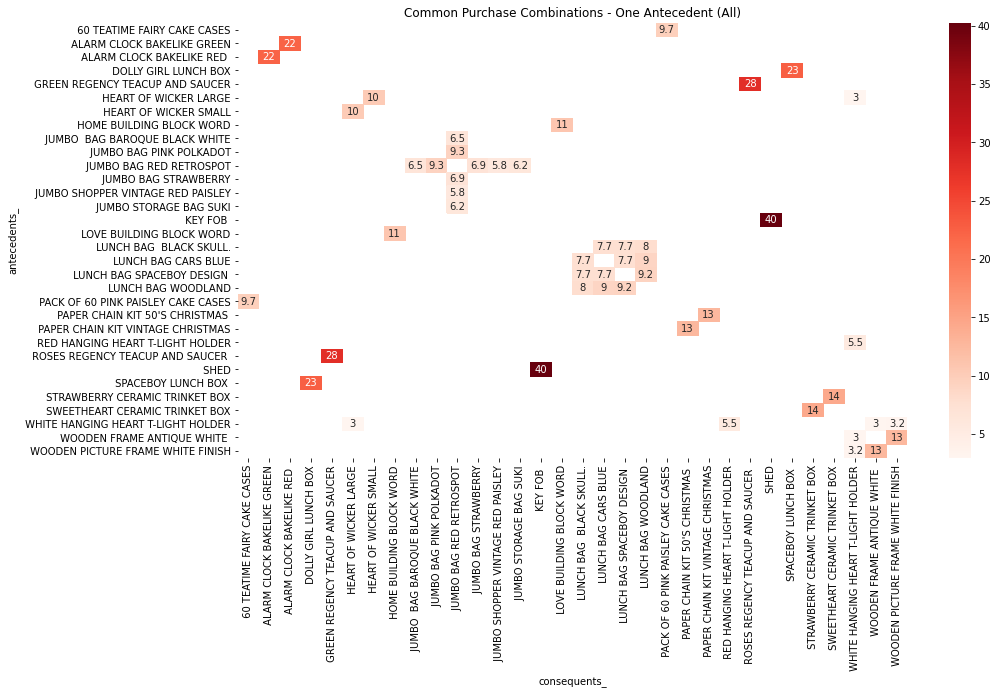

In [206]:
# generate heatmap 
fig, ax = plt.subplots(figsize = (15, 8))
sns.heatmap(pivot, annot = True, cmap = 'Reds')
plt.title('Common Purchase Combinations - One Antecedent (All)')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

It seems that there are frequent purchases of a shed and a key fob to lock it. There are also some alarm clock, lunch box, and tea combos that are bought together.

In [207]:
# when lhs items > 1
frequent_itemsets = apriori(onehot, min_support = 0.009, max_len = 3, use_colnames = True)
rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1)
rules['lhs items'] = rules['antecedents'].apply(lambda x: len(x))


In [208]:
rules[rules['lhs items'] > 1].sort_values('lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
421,"( , BIRTHDAY CARD)",( ELEPHANT),0.011879,0.010727,0.010727,0.903002,84.182448,0.010599,10.198936,2
420,"( , ELEPHANT)",( BIRTHDAY CARD),0.010727,0.014814,0.010727,1.000000,67.501852,0.010568,inf,2
476,"( POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUS...",( POPPY'S PLAYHOUSE LIVINGROOM ),0.012318,0.012181,0.009026,0.732739,60.155596,0.008876,3.696090,2
474,"( POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUS...",( POPPY'S PLAYHOUSE BEDROOM ),0.010590,0.014732,0.009026,0.852332,57.855381,0.008870,6.672165,2
475,"( POPPY'S PLAYHOUSE BEDROOM , POPPY'S PLAYHOU...",( POPPY'S PLAYHOUSE KITCHEN),0.009904,0.016323,0.009026,0.911357,55.831742,0.008864,11.097103,2
428,"( SHED, KEY FOB )",( BACK DOOR ),0.017695,0.015610,0.011303,0.638760,40.919911,0.011027,2.725028,2
427,"( BACK DOOR , KEY FOB )",( SHED),0.015528,0.017832,0.011303,0.727915,40.820364,0.011026,3.609786,2
426,"( BACK DOOR , SHED)",( KEY FOB ),0.011303,0.024663,0.011303,1.000000,40.546162,0.011024,inf,2
422,"( ELEPHANT, BIRTHDAY CARD)",( ),0.010727,0.026090,0.010727,1.000000,38.329127,0.010447,inf,2
433,"( GREEN REGENCY TEACUP AND SAUCER, ROSES REGE...",( PINK REGENCY TEACUP AND SAUCER),0.018106,0.019122,0.012565,0.693939,36.290940,0.012219,3.204850,2


In [209]:
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))
pivot = rules[rules['lhs items'] > 1].pivot(index = 'antecedents_', columns = 'consequents_', values = 'lift')

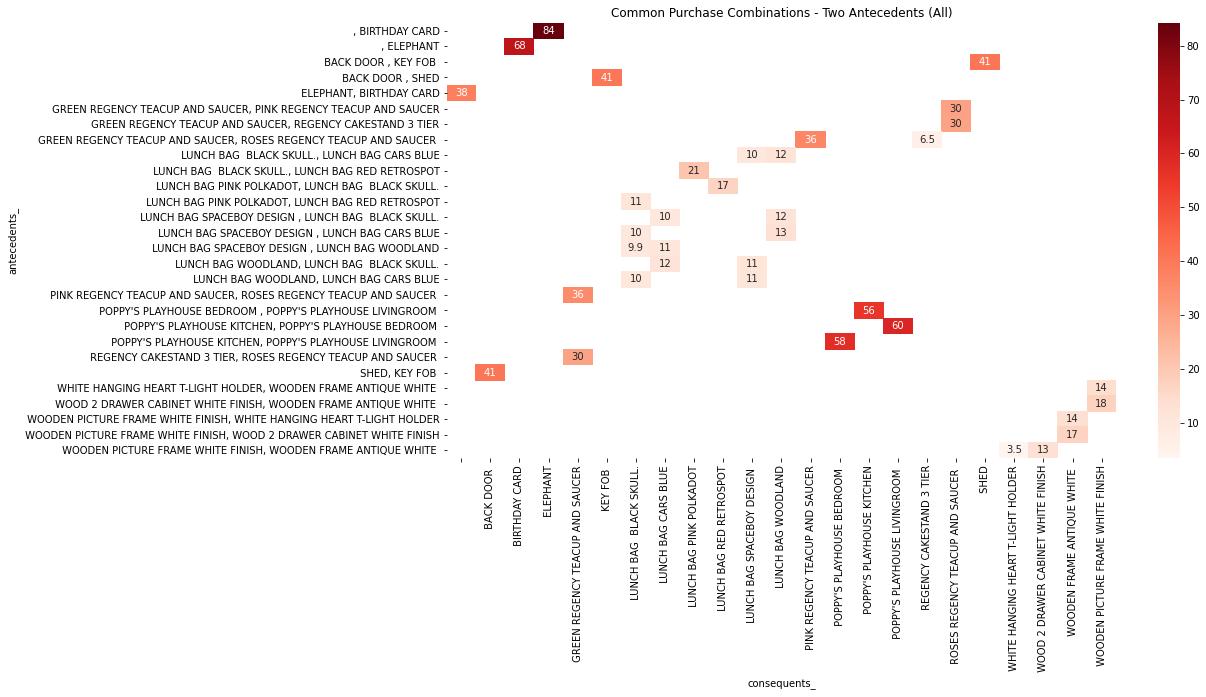

In [210]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.heatmap(pivot, annot = True, cmap = 'Reds')
plt.title('Common Purchase Combinations - Two Antecedents (All)')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

The shed and key fob combo is now combined with a back door for a complete backyard set. A bundle featuring an elephant + birthday card, as well as some playhouse purchases show a high purchase frequency.
<br>
<br>
Let's see how much of this overall picture is dictated by the United Kingdom.

### Market Basket Analysis for United Kingdom

As the United Kingdom makes up the vast majority of the company's revenue and customer base, determining the most popular product combinations can improve customer retention.

In [211]:
uk_basket = pd.read_csv('Documents\Springboard\Capstone Two\eng_onehot.csv')

# get all product purchases as a list

products = list(uk_basket['Description'].apply(lambda x: sorted(x.split(','))))

# instantiate transaction encoder

encoder = TransactionEncoder().fit(products)

onehot = encoder.transform(products)

# convert onehot encode data to dataframe

onehot = pd.DataFrame(onehot, columns = encoder.columns_)

# compute frequent items using apriori - up to three items

frequent_itemsets = apriori(onehot, min_support = 0.015, max_len = 3, use_colnames = True)

In [212]:
# compute all association rules for frequent_itemsets

rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1)
rules['lhs items'] = rules['antecedents'].apply(lambda x: len(x))
rules[rules['lhs items'] == 1].sort_values('lift', ascending = False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
9,( KEY FOB ),( BACK DOOR ),0.026887,0.017055,0.016933,0.629797,36.928283,0.016475,2.655151,1
8,( BACK DOOR ),( KEY FOB ),0.017055,0.026887,0.016933,0.992883,36.928283,0.016475,136.722408,1
42,( SHED),( KEY FOB ),0.019513,0.026887,0.019361,0.992224,36.903788,0.018836,125.142360,1
43,( KEY FOB ),( SHED),0.026887,0.019513,0.019361,0.720090,36.903788,0.018836,3.502870,1
17,( GREEN REGENCY TEACUP AND SAUCER),( PINK REGENCY TEACUP AND SAUCER),0.023670,0.018693,0.015112,0.638462,34.154583,0.014670,2.714253,1
16,( PINK REGENCY TEACUP AND SAUCER),( GREEN REGENCY TEACUP AND SAUCER),0.018693,0.023670,0.015112,0.808442,34.154583,0.014670,5.096773,1
19,( ROSES REGENCY TEACUP AND SAUCER ),( GREEN REGENCY TEACUP AND SAUCER),0.025734,0.023670,0.017722,0.688679,29.094932,0.017113,3.136090,1
18,( GREEN REGENCY TEACUP AND SAUCER),( ROSES REGENCY TEACUP AND SAUCER ),0.023670,0.025734,0.017722,0.748718,29.094932,0.017113,3.877183,1
10,( TOILET METAL SIGN),( BATHROOM METAL SIGN),0.020909,0.026523,0.015992,0.764877,28.838650,0.015438,4.140283,1
11,( BATHROOM METAL SIGN),( TOILET METAL SIGN),0.026523,0.020909,0.015992,0.602975,28.838650,0.015438,2.466069,1


In [213]:
# replace frozen sets with strings

rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

In [214]:
# transform dataframe of rules into a matrix using the lift metric

pivot = rules[rules['lhs items'] == 1].pivot(index = 'antecedents_', columns = 'consequents_', values = 'lift')

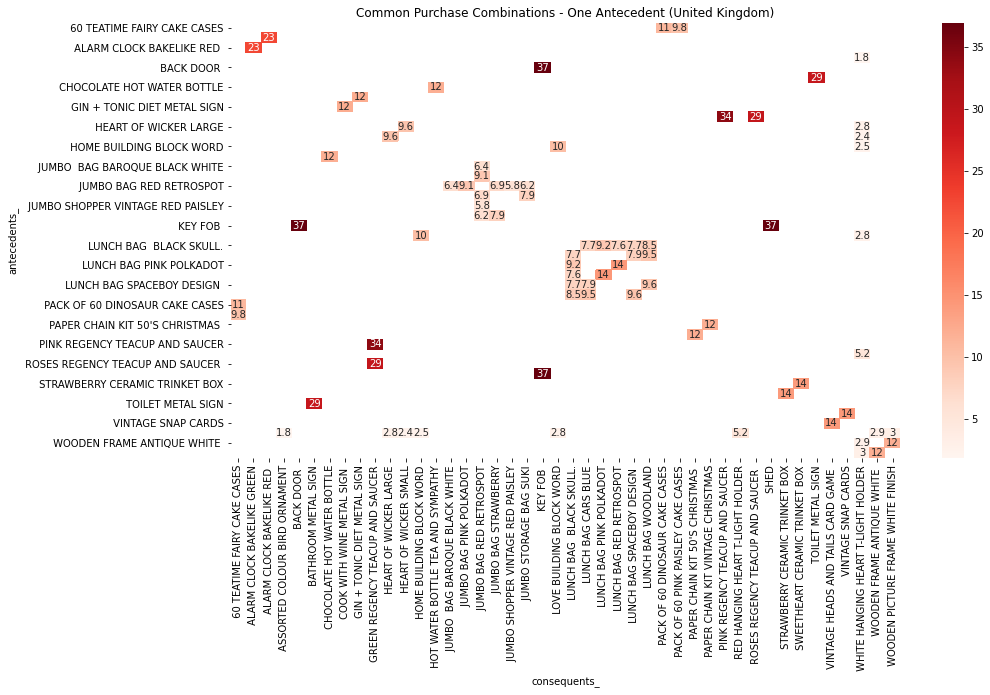

In [215]:
# generate heatmap 
fig, ax = plt.subplots(figsize = (15, 8))
sns.heatmap(pivot, annot = True, cmap = 'Reds')
plt.title('Common Purchase Combinations - One Antecedent (United Kingdom)')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

The shed, alarm clock, and tea related bundles are prominent in this map. Curiously, there is a metal sign bundle that involves Gin & Tonic and Wine metal signs. The first instance of alcohol related items seen in this analysis.

In [216]:
# when lhs items > 1
frequent_itemsets = apriori(onehot, min_support = 0.00875, max_len = 3, use_colnames = True)
rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1)
rules['lhs items'] = rules['antecedents'].apply(lambda x: len(x))

In [217]:
rules[rules['lhs items'] > 1].sort_values('lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
461,"( , BIRTHDAY CARD)",( ELEPHANT),0.011471,0.010287,0.010287,0.896825,87.177249,0.010169,9.592599,2
460,"( , ELEPHANT)",( BIRTHDAY CARD),0.010287,0.014081,0.010287,1.000000,71.019397,0.010143,inf,2
466,"( BACK DOOR , KEY FOB )",( FRONT DOOR ),0.016933,0.012108,0.009498,0.560932,46.326789,0.009293,2.249974,2
468,"( FRONT DOOR , KEY FOB )",( BACK DOOR ),0.012108,0.017055,0.009498,0.784461,45.997061,0.009292,4.560410,2
484,"( SHED, KEY FOB )",( GARAGE DESIGN),0.019361,0.012169,0.009559,0.493730,40.573312,0.009323,1.951196,2
486,"( KEY FOB , GARAGE DESIGN)",( SHED),0.012108,0.019513,0.009559,0.789474,40.459605,0.009323,4.657315,2
462,"( ELEPHANT, BIRTHDAY CARD)",( ),0.010287,0.026189,0.010287,1.000000,38.184241,0.010018,inf,2
474,"( SHED, KEY FOB )",( BACK DOOR ),0.019361,0.017055,0.012381,0.639498,37.497139,0.012051,2.726605,2
473,"( BACK DOOR , KEY FOB )",( SHED),0.016933,0.019513,0.012381,0.731183,37.472265,0.012051,3.647413,2
467,"( BACK DOOR , FRONT DOOR )",( KEY FOB ),0.009498,0.026887,0.009498,1.000000,37.193002,0.009243,inf,2


In [218]:
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))
pivot = rules[rules['lhs items'] > 1].pivot(index = 'antecedents_', columns = 'consequents_', values = 'lift')

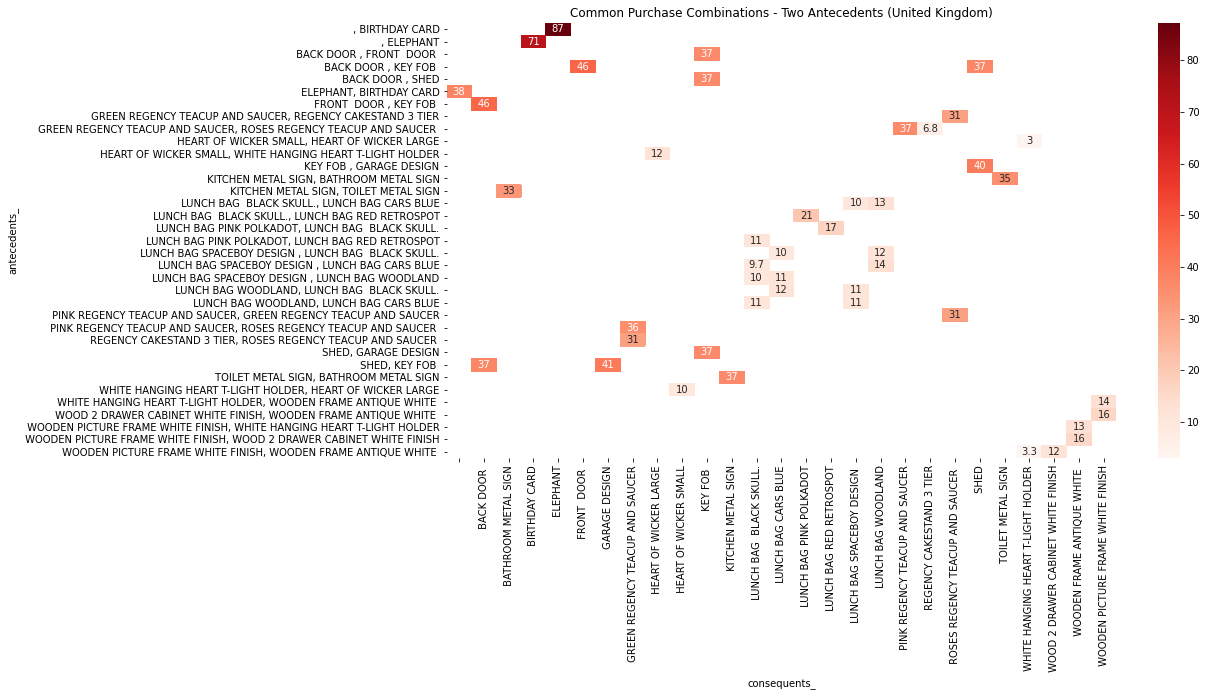

In [219]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.heatmap(pivot, annot = True, cmap = 'Reds')
plt.title('Common Purchase Combinations - Two Antecedents (United Kingdom)')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

The United Kingdom does indeed drive the backyard and birthday card & elephant bundle. Tea bundles are also strongly aligned.

### Market Basket Analysis for Ireland
As Ireland only has three unique customers, it is important to be aware of their buying habits.

In [253]:
ire_basket = pd.read_csv('Documents\Springboard\Capstone Two\ireland_onehot.csv')

In [254]:
# get all product purchases as a list

products = list(ire_basket['Description'].apply(lambda x: sorted(x.split(','))))

In [255]:
# instantiate transaction encoder

encoder = TransactionEncoder().fit(products)

onehot = encoder.transform(products)


In [256]:
# convert onehot encode data to dataframe

onehot = pd.DataFrame(onehot, columns = encoder.columns_)

In [257]:
# compute frequent items using apriori - up to three items

frequent_itemsets = apriori(onehot, min_support = 0.0325, max_len = 3, use_colnames = True)

In [258]:
# compute all association rules for frequent_itemsets

rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1)
rules['lhs items'] = rules['antecedents'].apply(lambda x: len(x))
rules[rules['lhs items'] == 1].sort_values('lift', ascending = False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
47,( REGENCY TEA PLATE GREEN ),( REGENCY TEA PLATE ROSES ),0.038095,0.041905,0.034286,0.900000,21.477273,0.032689,9.580952,1
46,( REGENCY TEA PLATE ROSES ),( REGENCY TEA PLATE GREEN ),0.041905,0.038095,0.034286,0.818182,21.477273,0.032689,5.290476,1
17,( EDWARDIAN PARASOL RED),( EDWARDIAN PARASOL BLACK),0.051429,0.060952,0.041905,0.814815,13.368056,0.038770,5.070857,1
16,( EDWARDIAN PARASOL BLACK),( EDWARDIAN PARASOL RED),0.060952,0.051429,0.041905,0.687500,13.368056,0.038770,3.035429,1
29,( LARGE POPCORN HOLDER ),( SMALL POPCORN HOLDER),0.043810,0.059048,0.034286,0.782609,13.253857,0.031699,4.328381,1
28,( SMALL POPCORN HOLDER),( LARGE POPCORN HOLDER ),0.059048,0.043810,0.034286,0.580645,13.253857,0.031699,2.280147,1
58,( PINK REGENCY TEACUP AND SAUCER),"( GREEN REGENCY TEACUP AND SAUCER, ROSES REGE...",0.072381,0.068571,0.060952,0.842105,12.280702,0.055989,5.899048,1
52,( PINK REGENCY TEACUP AND SAUCER),"( GREEN REGENCY TEACUP AND SAUCER, REGENCY CA...",0.072381,0.043810,0.036190,0.500000,11.413043,0.033020,1.912381,1
51,( GREEN REGENCY TEACUP AND SAUCER),"( PINK REGENCY TEACUP AND SAUCER, REGENCY CAK...",0.083810,0.038095,0.036190,0.431818,11.335227,0.032998,1.692952,1
25,( IVORY KITCHEN SCALES),( RED KITCHEN SCALES),0.078095,0.055238,0.047619,0.609756,11.038688,0.043305,2.420952,1


In [259]:
# replace frozen sets with strings

rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

In [260]:
# transform dataframe of rules into a matrix using the lift metric

pivot = rules[rules['lhs items'] == 1].pivot(index = 'antecedents_', columns = 'consequents_', values = 'lift')

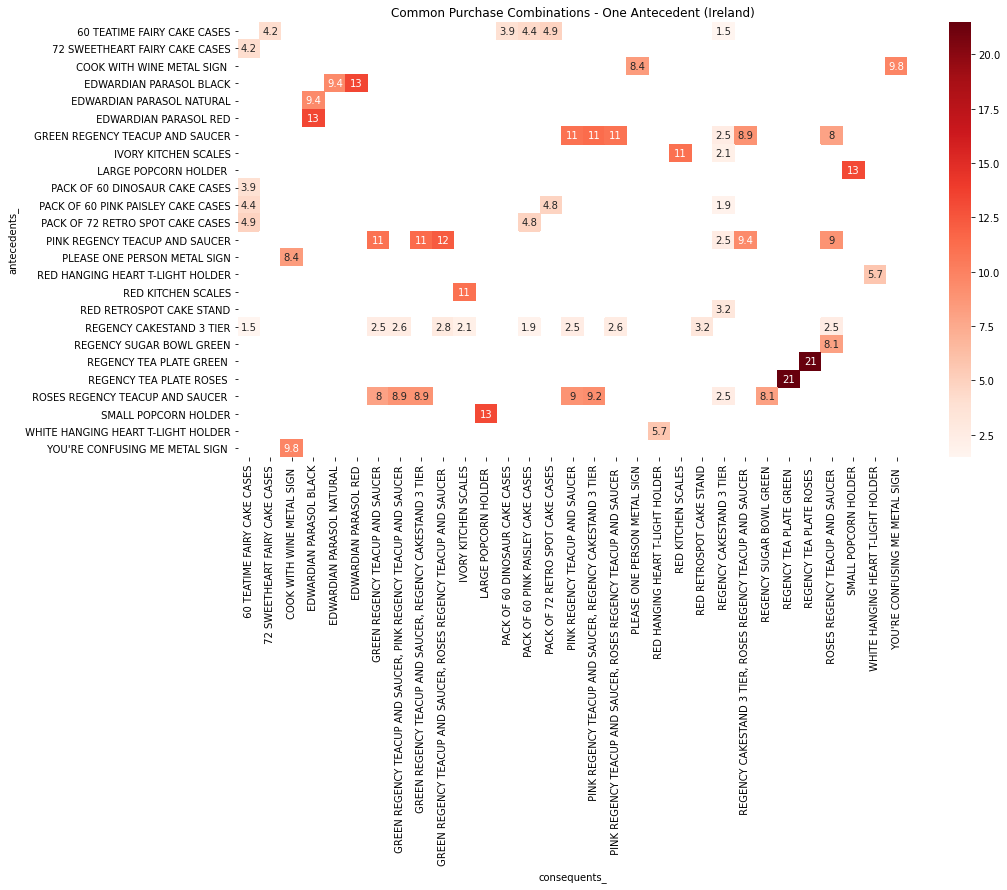

In [261]:
# generate heatmap 
fig, ax = plt.subplots(figsize = (15, 8))
sns.heatmap(pivot, annot = True, cmap = 'Reds')
plt.title('Common Purchase Combinations - One Antecedent (Ireland)')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

Irish wholesalers seem to focus strongly on tea related items of various colors, with the regency tea plates most frequently bought together.

In [267]:
# when lhs items > 1
frequent_itemsets = apriori(onehot, min_support = 0.025, max_len = 3, use_colnames = True)
rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1)
rules['lhs items'] = rules['antecedents'].apply(lambda x: len(x))

In [268]:
rules[rules['lhs items'] > 1].sort_values('lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
236,"( REGENCY TEA PLATE ROSES , REGENCY TEA PLATE...",( REGENCY TEA PLATE GREEN ),0.032381,0.038095,0.028571,0.882353,23.161765,0.027338,8.176190,2
244,"( REGENCY TEA PLATE GREEN , ROSES REGENCY TEA...",( REGENCY TEA PLATE ROSES ),0.028571,0.041905,0.026667,0.933333,22.272727,0.025469,14.371429,2
232,"( ROSES REGENCY TEACUP AND SAUCER , REGENCY S...",( REGENCY TEAPOT ROSES ),0.038095,0.034286,0.028571,0.750000,21.875000,0.027265,3.862857,2
237,"( REGENCY TEA PLATE ROSES , REGENCY TEA PLATE...",( REGENCY TEA PLATE PINK),0.034286,0.038095,0.028571,0.833333,21.875000,0.027265,5.771429,2
243,"( REGENCY TEA PLATE ROSES , ROSES REGENCY TEA...",( REGENCY TEA PLATE GREEN ),0.032381,0.038095,0.026667,0.823529,21.617647,0.025433,5.450794,2
249,"( REGENCY TEA PLATE ROSES , ROSES REGENCY TEA...",( REGENCY TEA PLATE PINK),0.032381,0.038095,0.026667,0.823529,21.617647,0.025433,5.450794,2
238,"( REGENCY TEA PLATE PINK, REGENCY TEA PLATE G...",( REGENCY TEA PLATE ROSES ),0.032381,0.041905,0.028571,0.882353,21.056150,0.027215,8.143810,2
219,"( REGENCY TEA PLATE ROSES , REGENCY SUGAR BOW...",( REGENCY MILK JUG PINK ),0.030476,0.041905,0.026667,0.875000,20.880682,0.025390,7.664762,2
250,"( REGENCY TEA PLATE PINK, ROSES REGENCY TEACU...",( REGENCY TEA PLATE ROSES ),0.030476,0.041905,0.026667,0.875000,20.880682,0.025390,7.664762,2
230,"( REGENCY TEAPOT ROSES , ROSES REGENCY TEACUP...",( REGENCY SUGAR BOWL GREEN),0.030476,0.045714,0.028571,0.937500,20.507812,0.027178,15.268571,2


In [269]:
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))
pivot = rules[rules['lhs items'] > 1].pivot(index = 'antecedents_', columns = 'consequents_', values = 'lift')

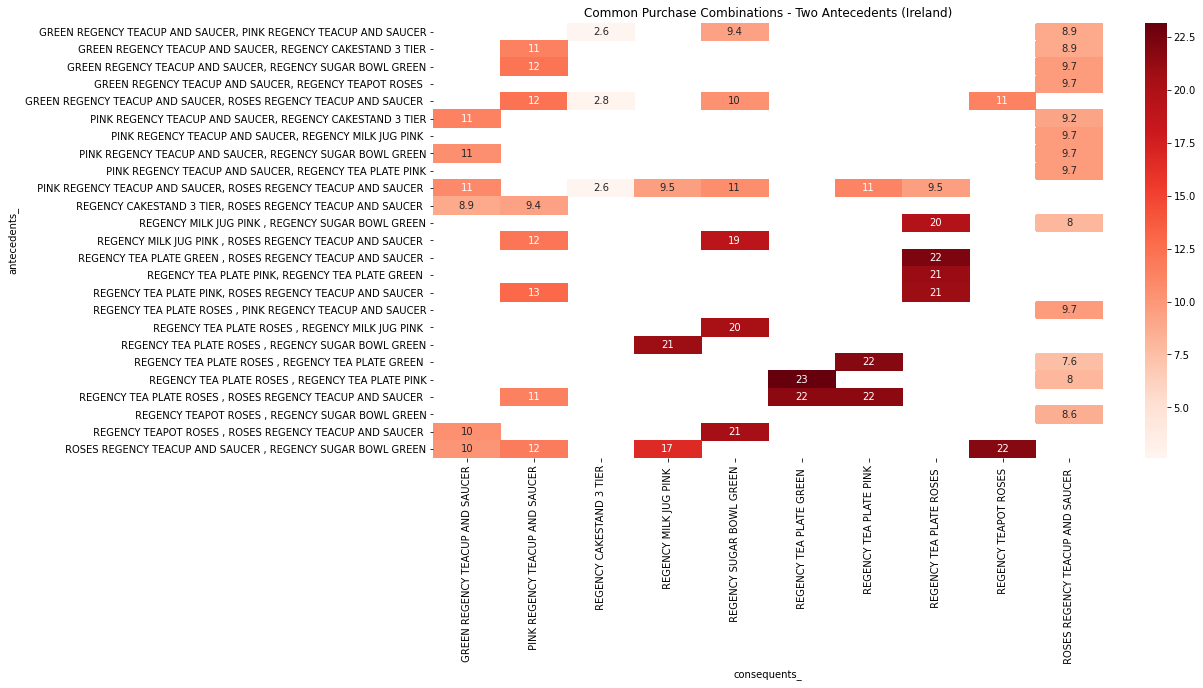

In [271]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.heatmap(pivot, annot = True, cmap = 'Reds')
plt.title('Common Purchase Combinations - Two Antecedents (Ireland)')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

This heatmap conclusively shows that the regency brand of tea equipment is highly sought after amongst the Irish wholesalers that are buying from the company.

### Market Basket Analysis for Netherlands

In [233]:
ned_basket = pd.read_csv('Documents\Springboard\Capstone Two\hol_onehot.csv')

# get all product purchases as a list

products = list(ned_basket['Description'].apply(lambda x: sorted(x.split(','))))

# instantiate transaction encoder

encoder = TransactionEncoder().fit(products)

onehot = encoder.transform(products)

# convert onehot encode data to dataframe

onehot = pd.DataFrame(onehot, columns = encoder.columns_)

# compute frequent items using apriori - up to three items

frequent_itemsets = apriori(onehot, min_support = 0.065, max_len = 3, use_colnames = True)

In [234]:
# compute all association rules for frequent_itemsets

rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1)
rules['lhs items'] = rules['antecedents'].apply(lambda x: len(x))
#rules[rules['lhs items'] == 1].sort_values('lift', ascending = False).head(20)

In [235]:
# replace frozen sets with strings

rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

In [236]:
pivot = rules[rules['lhs items'] == 1].pivot(index = 'antecedents_', columns = 'consequents_', values = 'lift')

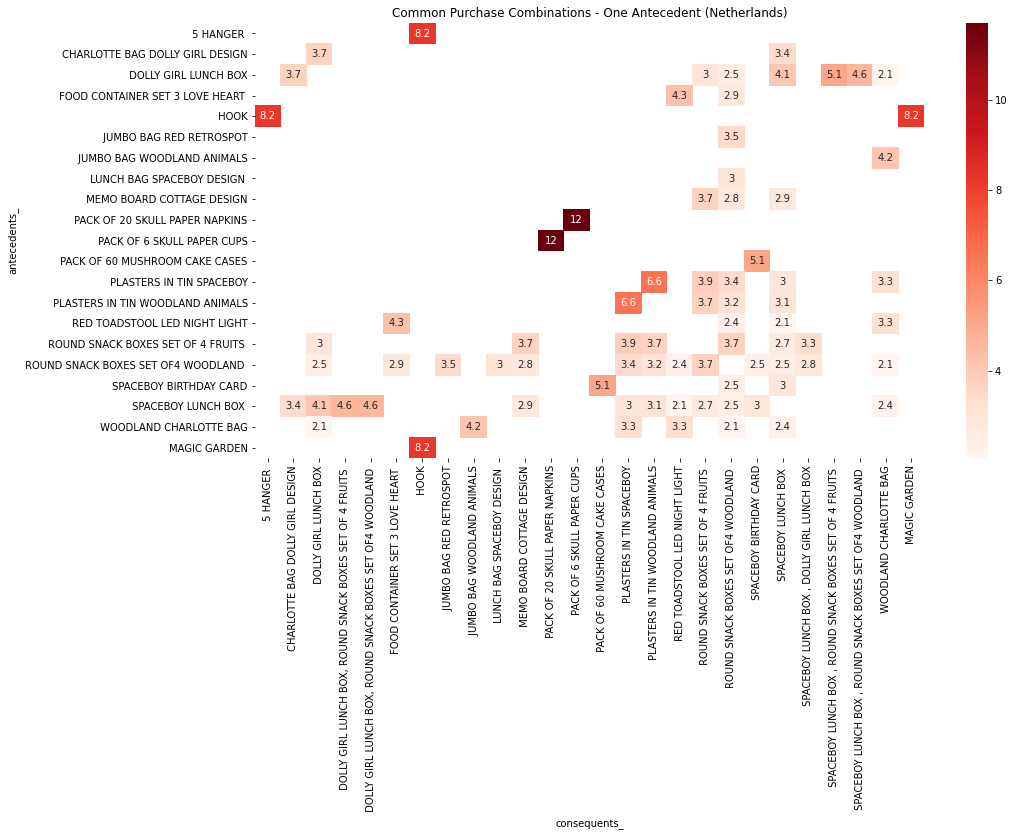

In [237]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.heatmap(pivot, annot = True, cmap = 'Reds')
plt.title('Common Purchase Combinations - One Antecedent (Netherlands)')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

Dutch customers seemingly diversify their purchases more than the English and Irish, with the most common bundle being matching paper products.

In [238]:
# when lhs items > 1
frequent_itemsets = apriori(onehot, min_support = 0.05, max_len = 3, use_colnames = True)
rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1)
rules['lhs items'] = rules['antecedents'].apply(lambda x: len(x))

In [239]:
# replace frozen sets with strings

rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

In [240]:
pivot = rules[rules['lhs items'] > 1].pivot(index = 'antecedents_', columns = 'consequents_', values = 'lift')

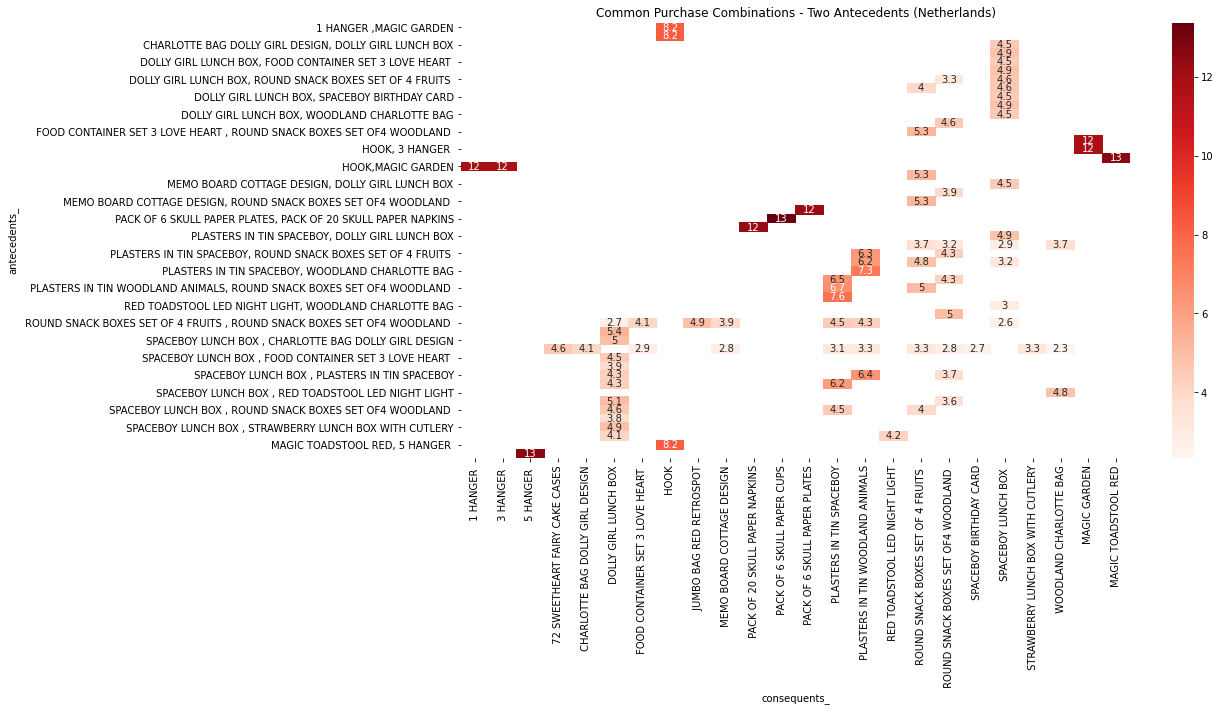

In [241]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.heatmap(pivot, annot = True, cmap = 'Reds')
plt.title('Common Purchase Combinations - Two Antecedents (Netherlands)')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

Similar results with two antecedents. Same frequency of paper products along with a bundle of a hook, magic garden, magic toadstool and 5 hanger set. There's also some lunch box bundles, albeit at a lower frequency level.

### Market Basket Analysis for Germany

In [272]:
ger_basket = pd.read_csv('Documents\Springboard\Capstone Two\ger_onehot.csv')

# get all product purchases as a list

products = list(ger_basket['Description'].apply(lambda x: sorted(x.split(','))))

# instantiate transaction encoder

encoder = TransactionEncoder().fit(products)

onehot = encoder.transform(products)

# convert onehot encode data to dataframe

onehot = pd.DataFrame(onehot, columns = encoder.columns_)

# compute frequent items using apriori - up to three items

frequent_itemsets = apriori(onehot, min_support = 0.04, max_len = 3, use_colnames = True)

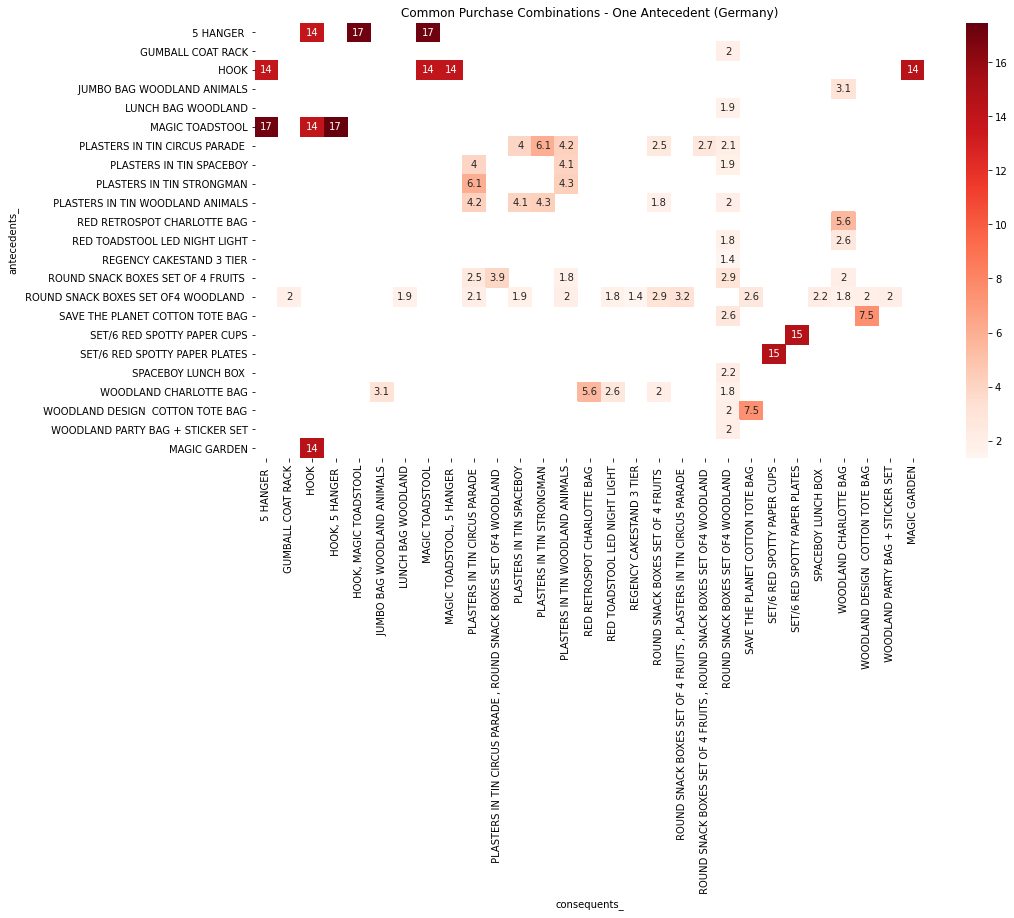

In [273]:
# compute all association rules for frequent_itemsets

rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1)
rules['lhs items'] = rules['antecedents'].apply(lambda x: len(x))
#rules[rules['lhs items'] == 1].sort_values('lift', ascending = False).head(20)
# replace frozen sets with strings

rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))
pivot = rules[rules['lhs items'] == 1].pivot(index = 'antecedents_', columns = 'consequents_', values = 'lift')

fig, ax = plt.subplots(figsize = (15, 8))
sns.heatmap(pivot, annot = True, cmap = 'Reds')
plt.title('Common Purchase Combinations - One Antecedent (Germany)')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

Generally the same bundling habits as the Netherlands.

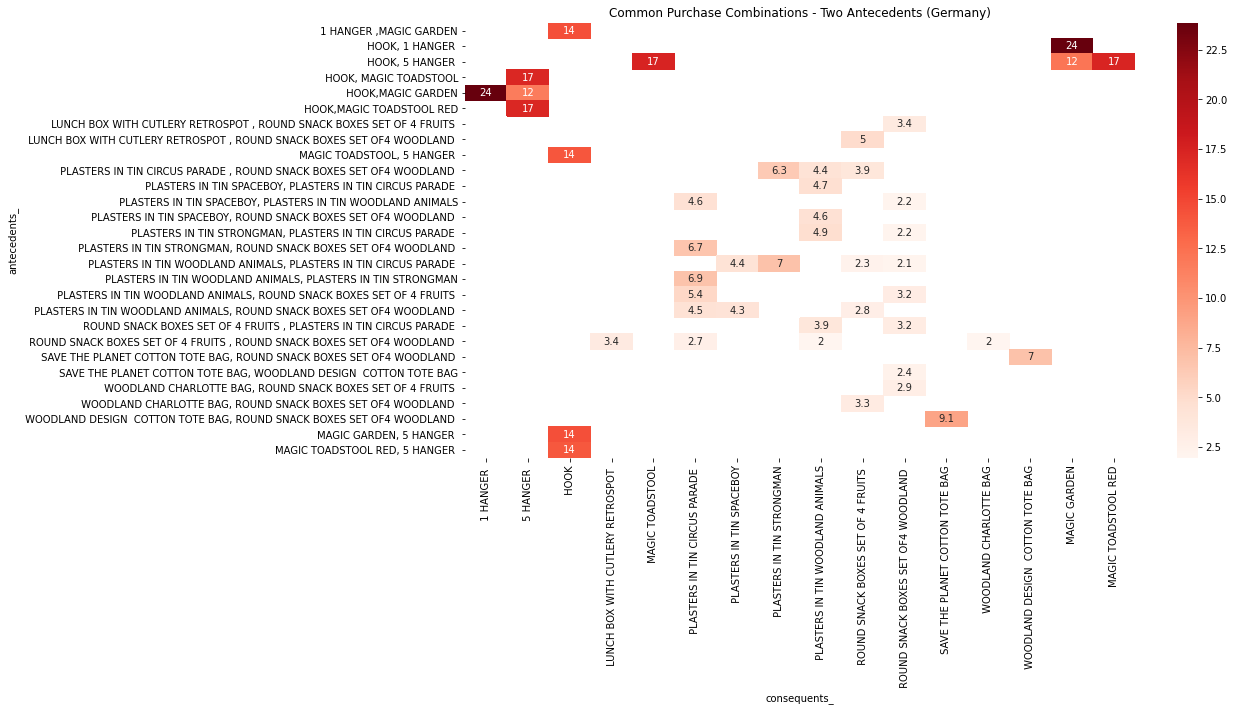

In [274]:
# when lhs items > 1
frequent_itemsets = apriori(onehot, min_support = 0.025, max_len = 3, use_colnames = True)
rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1)
rules['lhs items'] = rules['antecedents'].apply(lambda x: len(x))

# replace frozen sets with strings

rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

pivot = rules[rules['lhs items'] > 1].pivot(index = 'antecedents_', columns = 'consequents_', values = 'lift')

fig, ax = plt.subplots(figsize = (15, 8))
sns.heatmap(pivot, annot = True, cmap = 'Reds')
plt.title('Common Purchase Combinations - Two Antecedents (Germany)')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

While bought at a lower frequency than the hook and magic garden combos, an interesting development in Germany is the bundling of plasters in tin sets of various types. 

### France Basket Analysis

In [275]:
fra_basket = pd.read_csv('Documents\Springboard\Capstone Two\onehot_fra.csv')

# get all product purchases as a list

products = list(fra_basket['Description'].apply(lambda x: sorted(x.split(','))))

# instantiate transaction encoder

encoder = TransactionEncoder().fit(products)

onehot = encoder.transform(products)

# convert onehot encode data to dataframe

onehot = pd.DataFrame(onehot, columns = encoder.columns_)

# compute frequent items using apriori - up to three items

frequent_itemsets = apriori(onehot, min_support = 0.04, max_len = 3, use_colnames = True)

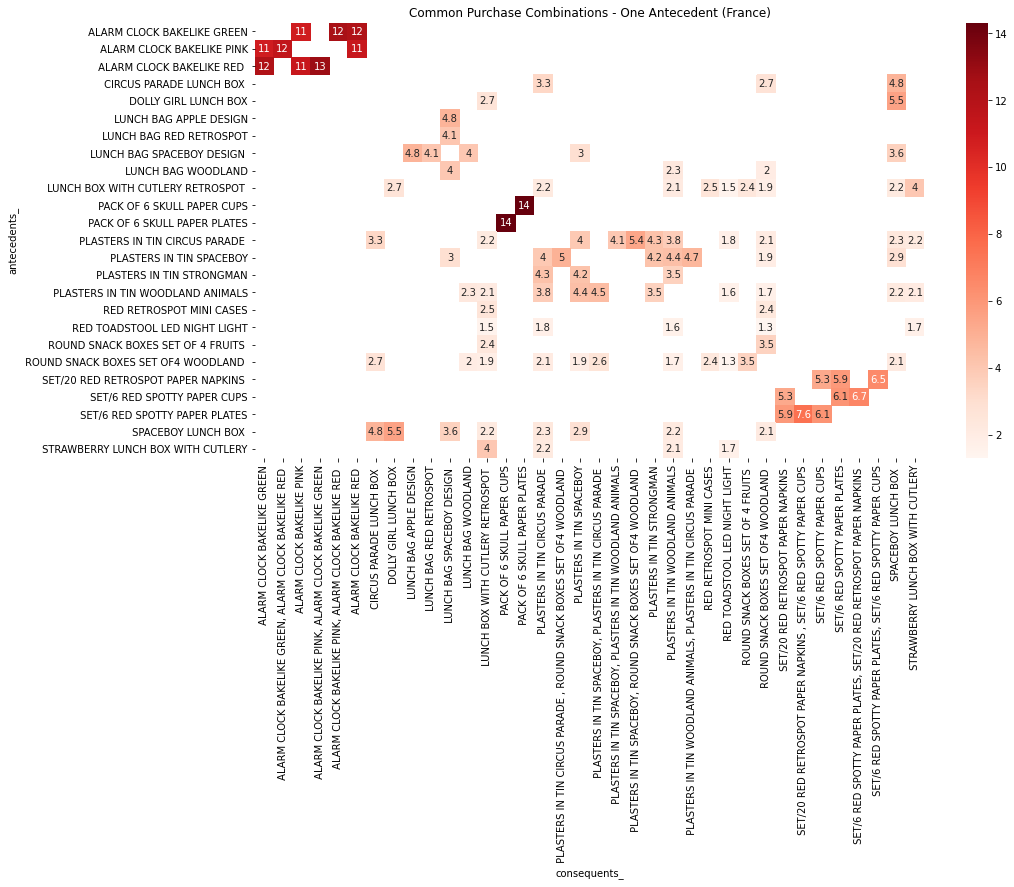

In [276]:
# compute all association rules for frequent_itemsets

rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1)
rules['lhs items'] = rules['antecedents'].apply(lambda x: len(x))
#rules[rules['lhs items'] == 1].sort_values('lift', ascending = False).head(20)
# replace frozen sets with strings

rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))
pivot = rules[rules['lhs items'] == 1].pivot(index = 'antecedents_', columns = 'consequents_', values = 'lift')

fig, ax = plt.subplots(figsize = (15, 8))
sns.heatmap(pivot, annot = True, cmap = 'Reds')
plt.title('Common Purchase Combinations - One Antecedent (France)')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

French product combinations focus on paper products and different alarm clocks as well, so the demand for alarm clocks is not exclusive to the United Kingdom as the backyard combination seems to be. 

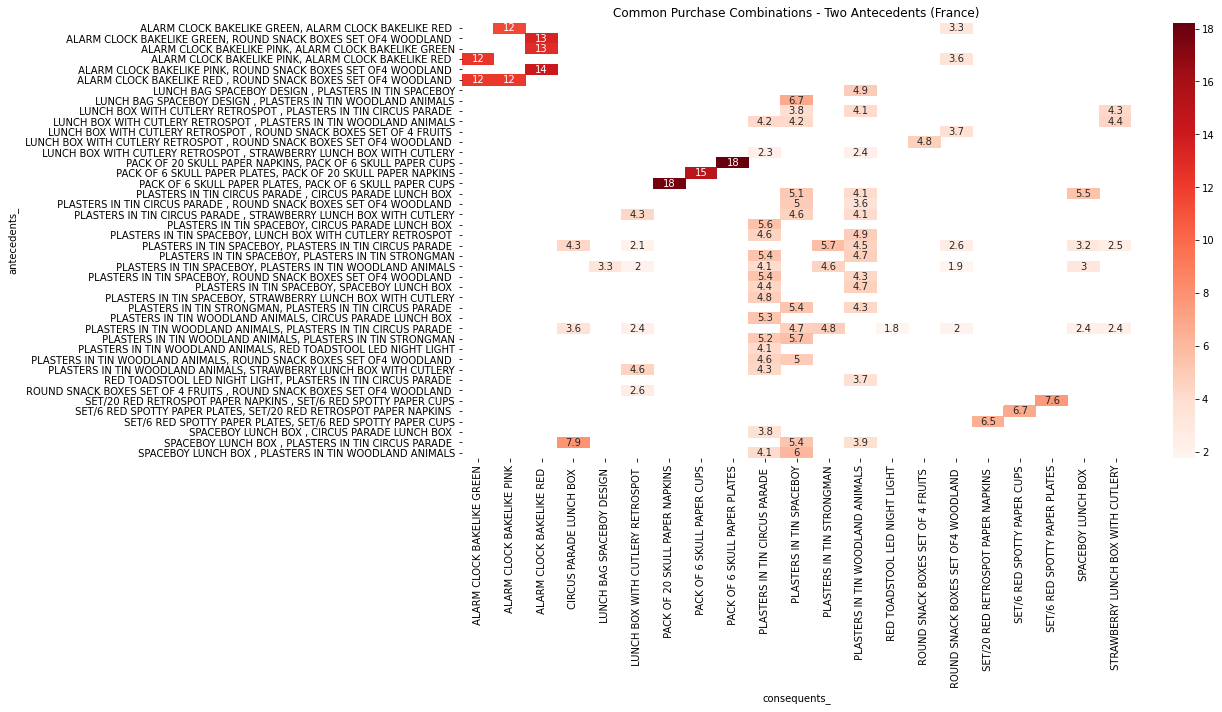

In [247]:
# when lhs items > 1
frequent_itemsets = apriori(onehot, min_support = 0.03, max_len = 3, use_colnames = True)
rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1)
rules['lhs items'] = rules['antecedents'].apply(lambda x: len(x))

# replace frozen sets with strings

rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

pivot = rules[rules['lhs items'] > 1].pivot(index = 'antecedents_', columns = 'consequents_', values = 'lift')

fig, ax = plt.subplots(figsize = (15, 8))
sns.heatmap(pivot, annot = True, cmap = 'Reds')
plt.title('Common Purchase Combinations - Two Antecedents (France)')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

Bundling of paper products and alarm clocks strengthens with two antecedents.

### Australia Basket Analysis

In [248]:
aus_basket = pd.read_csv('Documents\Springboard\Capstone Two\onehot_aus.csv')

# get all product purchases as a list

products = list(aus_basket['Description'].apply(lambda x: sorted(x.split(','))))

# instantiate transaction encoder

encoder = TransactionEncoder().fit(products)

onehot = encoder.transform(products)

# convert onehot encode data to dataframe

onehot = pd.DataFrame(onehot, columns = encoder.columns_)

# compute frequent items using apriori - up to three items

frequent_itemsets = apriori(onehot, min_support = 0.05, max_len = 3, use_colnames = True)

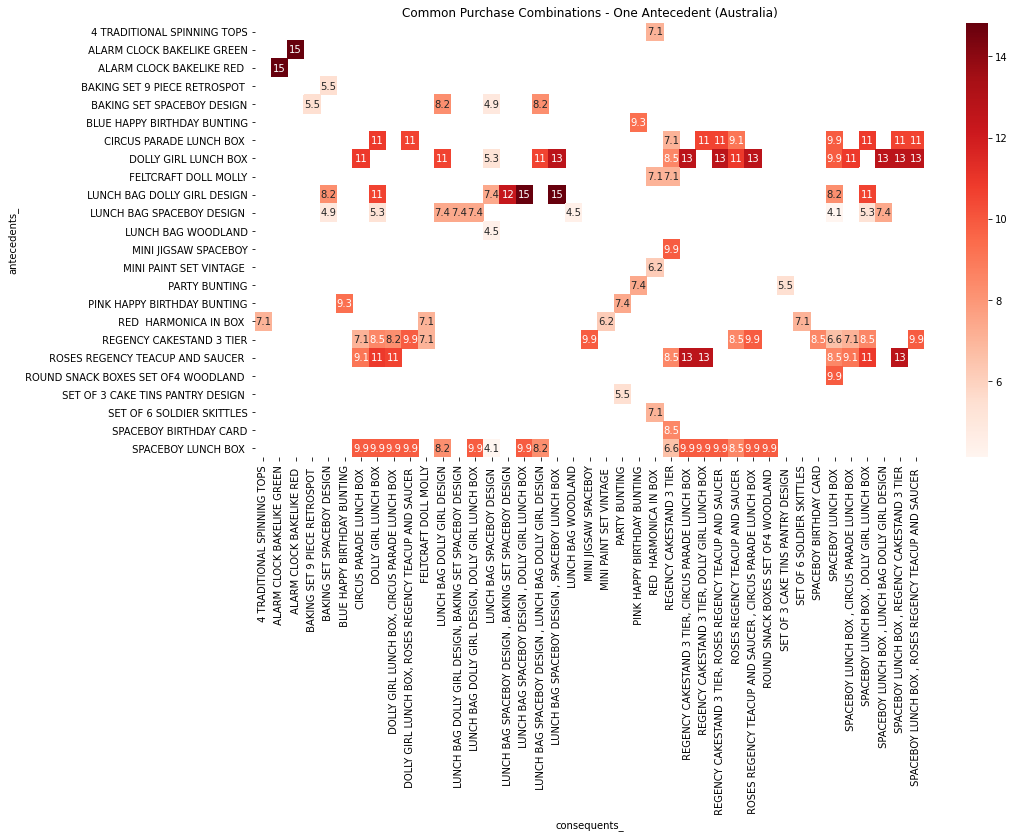

In [249]:
# compute all association rules for frequent_itemsets

rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1)
rules['lhs items'] = rules['antecedents'].apply(lambda x: len(x))
#rules[rules['lhs items'] == 1].sort_values('lift', ascending = False).head(20)
# replace frozen sets with strings

rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))
pivot = rules[rules['lhs items'] == 1].pivot(index = 'antecedents_', columns = 'consequents_', values = 'lift')

fig, ax = plt.subplots(figsize = (15, 8))
sns.heatmap(pivot, annot = True, cmap = 'Reds')
plt.title('Common Purchase Combinations - One Antecedent (Australia)')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

Australia shows frequent purchases of alarm clocks and lunch boxes with their wholesalers, with some birthday and tea products as well.

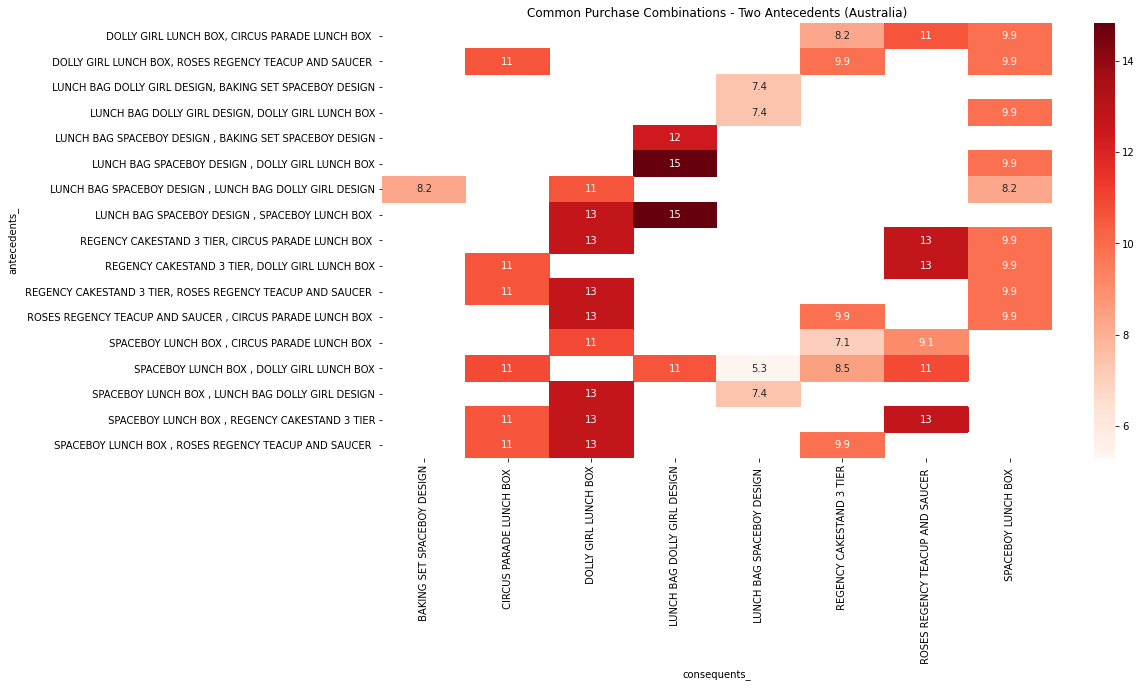

In [252]:
# when lhs items > 1
frequent_itemsets = apriori(onehot, min_support = 0.045, max_len = 3, use_colnames = True)
rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1)
rules['lhs items'] = rules['antecedents'].apply(lambda x: len(x))

# replace frozen sets with strings

rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

pivot = rules[rules['lhs items'] > 1].pivot(index = 'antecedents_', columns = 'consequents_', values = 'lift')

fig, ax = plt.subplots(figsize = (15, 8))
sns.heatmap(pivot, annot = True, cmap = 'Reds')
plt.title('Common Purchase Combinations - Two Antecedents (Australia)')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

Alarm clock bundles seem to stop at dual purchases, because the two antecedent heatmap shows only lunch box and tea combinations. There are some combinations that even involve both tea and lunch box purchases. This may be by the same wholesaler that generates most of the company's Australia revenue.

### Measures of Central Tendancy

### Median Purchase Volume for Popular Products
Use this to encourage customers to purchase more in demand items at a lower cost.

In [154]:
# Get median amount of product bought at any given purchase

df_prod_quant = df.groupby(['StockCode', 'Description'])['Quantity'].median()
df_prod_quant_sort = df_prod_quant.sort_values(ascending = False)
df_prod_quant_sort.head(10)

StockCode  Description                      
16044      POP-ART FLUORESCENT PENS             3096.0
85218      S/5 MINI ICE CREAM FRIDGE MAGNETS     996.0
84760L     LARGE HANGING GLASS+ZINC LANTERN      560.0
15059A     ENGLISH ROSE EDWARDIAN PARASOL        505.0
20800      LARGE GLASS SUNDAE DISH CLEAR         498.0
20715      LITTLE FLOWER SHOPPER BAG             400.0
37471      MULTICOLOUR POLKADOT PLATE            348.0
           MULTICOLOUR DOTS PLATE                344.0
17011C     ORIGAMI LAVENDER INCENSE+FLOWER       334.0
84568      GIRLS ALPHABET IRON ON PATCHES        288.0
Name: Quantity, dtype: float64

### Look at Seasonality of Products

In [155]:
# Quantity purchased per month

df.groupby('Month')['Quantity'].sum()

Month
1      719258
2      637973
3      850828
4      643017
5      758716
6      754425
7      692396
8      851906
9     1111692
10    1190535
11    1332804
12     925825
Name: Quantity, dtype: int64

As expected, there's a noticable uptick in purchases during the fall months in preparation for the holiday season.

In [157]:
# Obtain information for all months in for loop

#list = []

for i in df['Month'].unique():
    df_temp = df[df['Month'] == i]
    temp_quant = df_temp.groupby(['Description', 'Price'])['Quantity'].sum()
    temp_quant = temp_quant.sort_values(ascending = False)
    print(temp_quant.head(1))
    #list.append(temp_quant.head(1))
#print(list)    

Description                         Price
WHITE HANGING HEART T-LIGHT HOLDER  2.55     8752
Name: Quantity, dtype: int64
Description                     Price
MEDIUM CERAMIC TOP STORAGE JAR  1.04     74215
Name: Quantity, dtype: int64
Description                         Price
BLACK AND WHITE PAISLEY FLOWER MUG  0.1      19152
Name: Quantity, dtype: int64
Description                  Price
SET/6 STRAWBERRY PAPER CUPS  0.1      12960
Name: Quantity, dtype: int64
Description                        Price
WORLD WAR 2 GLIDERS ASSTD DESIGNS  0.21     10848
Name: Quantity, dtype: int64
Description           Price
SMALL POPCORN HOLDER  0.72     6008
Name: Quantity, dtype: int64
Description                    Price
ASSORTED FLOWER COLOUR "LEIS"  0.42     5280
Name: Quantity, dtype: int64
Description                      Price
GIRLS ALPHABET IRON ON PATCHES   0.17     4320
Name: Quantity, dtype: int64
Description                   Price
SET/6 FRUIT SALAD PAPER CUPS  0.08     7128
Name: Quantity, 

These prices are pretty cheap. It makes sense that they would be the most bought products for the month to take advantage of economies of scale. Offering a slight discount above a certain threshold would be a possible avenue towards purchasing more of these products. 
<br>
<br>
With the volume seen in this table, it may not be necessary to add a corresponding price increase to offset the volume discount, as selling this amount of volume wholesale will have meant the company itself has likely incurred reduced costs itself to stock the inventory.

Regarding the potential seasonality of products, the only particular products that stand out as something one would buy at a certain time period are the black and white flower mug and strawberry paper cups in February and March.
<br><br>
These products likely be bought in preparation for Spring sales for social events.

### Unique Users per Country

In [158]:
# Count number of unique customers

df['Customer ID'].nunique()

5831

5831 customers have purchased something from this company within the two year timeframe.

In [159]:
# Group by country

unique_customers = df.groupby('Country')['Customer ID'].nunique()
unique_customers = unique_customers.sort_values(ascending = False)
print(unique_customers)

Country
United Kingdom          5324
Germany                  106
France                    93
Spain                     37
Belgium                   29
Portugal                  23
Switzerland               22
Netherlands               22
Sweden                    19
Italy                     17
Australia                 15
Finland                   13
Channel Islands           13
Austria                   13
Norway                    12
Cyprus                    11
Denmark                   11
Japan                     10
USA                        8
Poland                     6
Canada                     5
Israel                     4
Greece                     4
United Arab Emirates       4
EIRE                       3
Brazil                     2
Bahrain                    2
Korea                      2
Malta                      2
RSA                        2
Iceland                    1
Lebanon                    1
Czech Republic             1
Lithuania                  1
Nigeri

In [160]:
# What percentage of the total customer base is the UK?
np.divide(unique_customers['United Kingdom'], df['Customer ID'].nunique()) * 100

91.30509346595781

United Kingdom comprises of 91.31% of total customers at this company, presenting a substantial lack of diversification on top of geopolitical risks.
<br> <br>
Curiously, only three customers have purchased products from the company, despite generating the second most revenue over this time period. Two of the three customers are in the overall top five buyers. It is vital that these whales continue as customers.

## Insights

In [161]:
# Compute average monthly revenue

uk_mean = df_uk.groupby(['Month', 'Year'])['Subtotal'].mean()
#plt.boxplot(uk_mean)
#plt.show()

In [162]:
print(uk_mean)

Month  Year
1      2010    20.768952
       2011    24.361914
2      2010    19.263227
       2011    20.033299
3      2010    19.440269
       2011    19.458284
4      2010    20.274350
       2011    19.521930
5      2010    19.520739
       2011    21.556111
6      2010    18.931270
       2011    22.115711
7      2010    20.601099
       2011    20.546378
8      2010    21.024112
       2011    21.455480
9      2010    21.759599
       2011    22.235567
10     2010    19.494979
       2011    18.663059
11     2010    17.810070
       2011    16.565264
12     2009    21.391703
       2010    20.847987
       2011    19.295501
Name: Subtotal, dtype: float64


In [163]:
ire_mean = df_ire.groupby(['Month', 'Year'])['Subtotal'].mean()

In [164]:
ned_mean = df_ned.groupby(['Month', 'Year'])['Subtotal'].mean()

In [165]:
ger_mean = df_ger.groupby(['Month', 'Year'])['Subtotal'].mean()

In [166]:
fra_mean = df_fra.groupby(['Month', 'Year'])['Subtotal'].mean()

In [167]:
aus_mean = df_aus.groupby(['Month', 'Year'])['Subtotal'].mean()

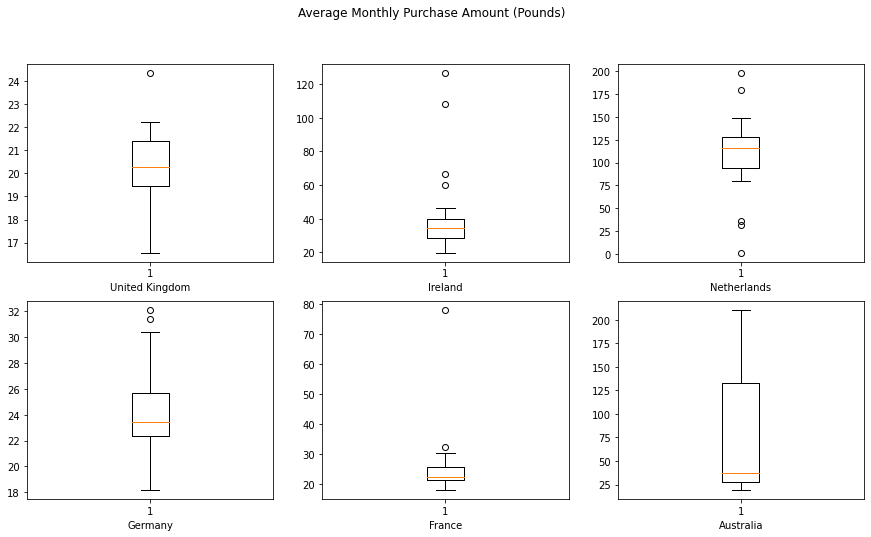

In [168]:
# Create a subplot matrix to view and compare countries

fig, ax = plt.subplots(2, 3, figsize = (15, 8))
fig.suptitle('Average Monthly Purchase Amount (Pounds)')


ax[0, 0].boxplot(uk_mean)
ax[0, 0].set_xlabel('United Kingdom')

ax[0, 1].boxplot(ire_mean)
ax[0, 1].set_xlabel('Ireland')

ax[0, 2].boxplot(ned_mean)
ax[0, 2].set_xlabel('Netherlands')

ax[1, 0].boxplot(ger_mean)
ax[1, 0].set_xlabel('Germany')

ax[1, 1].boxplot(fra_mean)
ax[1, 1].set_xlabel('France')

ax[1, 2].boxplot(aus_mean)
ax[1, 2].set_xlabel('Australia')

plt.show()

On average, the Netherlands spends significantly more money per purchase than the rest of the countries that generate significant revenue, with a mean purchase amount hovering around £125. Expanding market share in the Netherlands may be advisable if the wholesaler base has anywhere near as expensive a taste as the company's current customers.
<br>
<br>
Australia has a very high variance of purchases but an average purchase amount close to other countries. There are periods, however, where they will spend significant money.

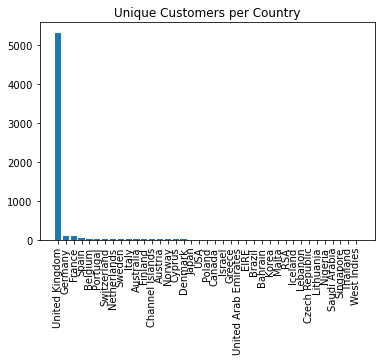

In [169]:
# Visualize unique customers via a bar chart

fig, ax = plt.subplots()
ax.bar(unique_customers.index, unique_customers)
plt.title('Unique Customers per Country')
plt.xticks(rotation = 90)
plt.show()

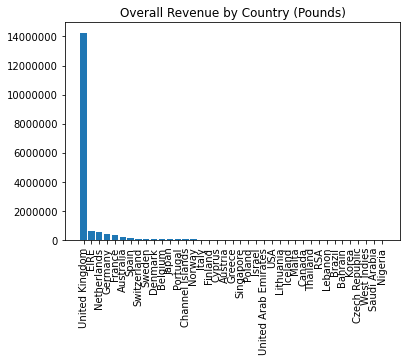

In [170]:
# Visualize revenue by country via a bar chart

fig, ax = plt.subplots()
ax.bar(df_sub_geo_sort.index, df_sub_geo_sort)
ax.ticklabel_format(axis = 'y', style = 'plain')
plt.title('Overall Revenue by Country (Pounds)')
plt.xticks(rotation = 90)
plt.show()

A substantial majority of both the company's userbase and revenue comes from the United Kingdom. This opens the company up to substantial geopolitical risk in the case of regulations making the current situation untenable.

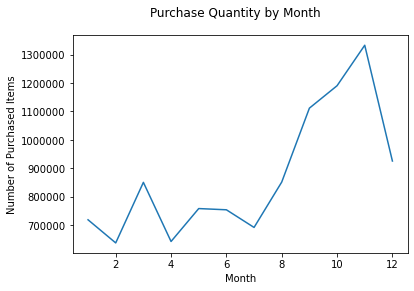

In [171]:
# Create time-series for monthly purchase quantity

fig, ax = plt.subplots()
fig.suptitle('Purchase Quantity by Month')
ax.plot(df.groupby('Month')['Quantity'].sum())
ax.ticklabel_format(axis = 'y', style = 'plain')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Purchased Items')
plt.show()

Purchase quantity, unsurprisingly, is consistent with revenue generated (higher during holiday season).

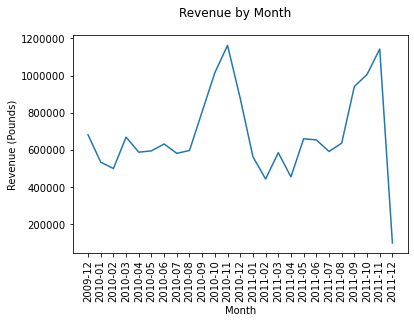

In [172]:
# Create time-series for monthly revenue

fig, ax = plt.subplots()
fig.suptitle('Revenue by Month')
ax.plot(df.groupby('month_year')['Subtotal'].sum())
ax.ticklabel_format(axis = 'y', style = 'plain')
ax.set_xlabel('Month')
ax.set_ylabel('Revenue (Pounds)')
plt.xticks(rotation = 90)
plt.show()

In the month by month revenue chart, we see that revenue spikes towards the end of each year as wholesalers prepare for the holiday surge. There is not complete data for every day of December 2011, so that is why the revenue is so low in comparison to previousl Decembers.

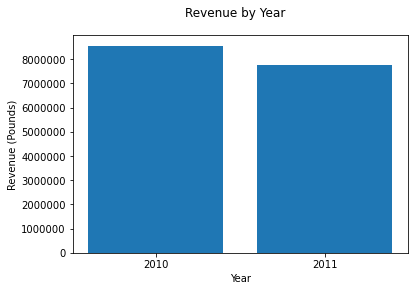

In [173]:
# Bar chart for yearly revenue
df_year = df[df['Year']!= 2009] # 2009 only contains December data so no point in grouping with other years

fig, ax = plt.subplots()
fig.suptitle('Revenue by Year')
ax.bar(df_year['Year'].unique(), df_year.groupby('Year')['Subtotal'].sum())
ax.ticklabel_format(axis = 'y', style = 'plain')
ax.set_xlabel('Year')
ax.set_ylabel('Revenue (Pounds)')
ax.locator_params(axis = 'x', nbins = 2)
plt.show()

Revenue is slightly down from 2011 compared to 2010. Some of that is accounted for by an incomplete December 2011, but it would still likely show no revenue growth year over year. Some action should be taken to grow revenues going forward.

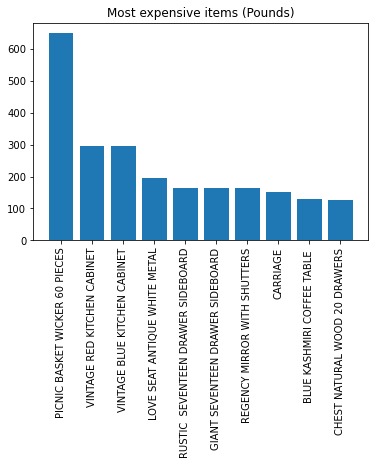

In [174]:
# Bar chart for most expensive items

fig, ax = plt.subplots()
ax.bar(temp_head.index, temp_head)
plt.title('Most expensive items (Pounds)')
plt.xticks(rotation = 90)
plt.show()

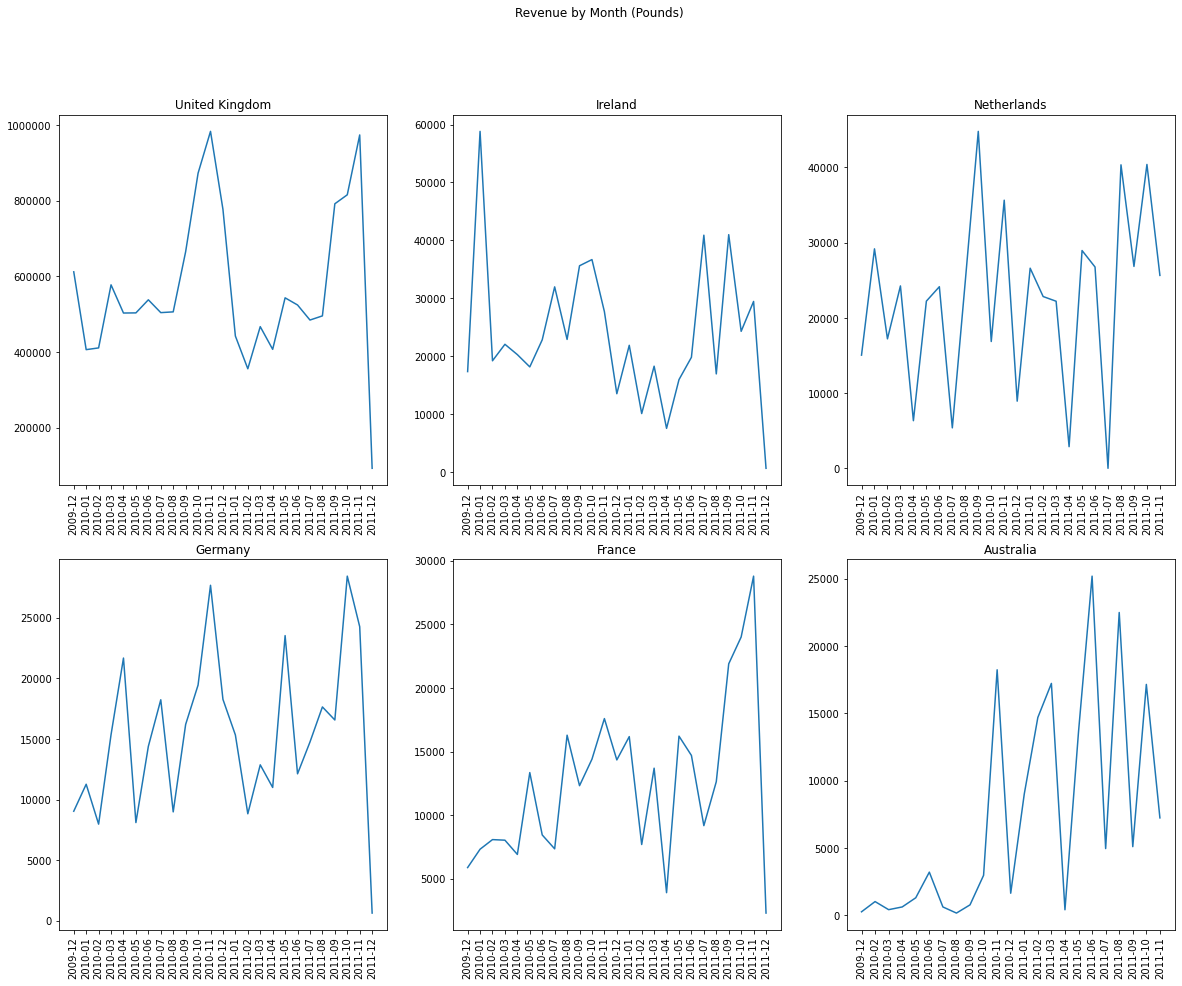

In [176]:
# Create time series for UK revenue

fig, ax = plt.subplots(2, 3, figsize = (20, 15))
fig.suptitle('Revenue by Month (Pounds)')

ax[0,0].plot(df_uk.groupby('month_year')['Subtotal'].sum())
ax[0,0].ticklabel_format(axis = 'y', style = 'plain')
ax[0,0].title.set_text('United Kingdom')
ax[0,1].plot(df_ire.groupby('month_year')['Subtotal'].sum())
ax[0,1].title.set_text('Ireland')
ax[0,2].plot(df_ned.groupby('month_year')['Subtotal'].sum())
ax[0,2].title.set_text('Netherlands')
ax[1,0].plot(df_ger.groupby('month_year')['Subtotal'].sum())
ax[1,0].title.set_text('Germany')
ax[1,1].plot(df_fra.groupby('month_year')['Subtotal'].sum())
ax[1,1].title.set_text('France')
ax[1,2].plot(df_aus.groupby('month_year')['Subtotal'].sum())
ax[1,2].title.set_text('Australia')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.show()

The United Kingdom is very seasonal in their buying habits. There are holiday spikes in Germany as well, but those are not as pronounced. Promisingly, France and Australia are seemingly purchasing more over this period.

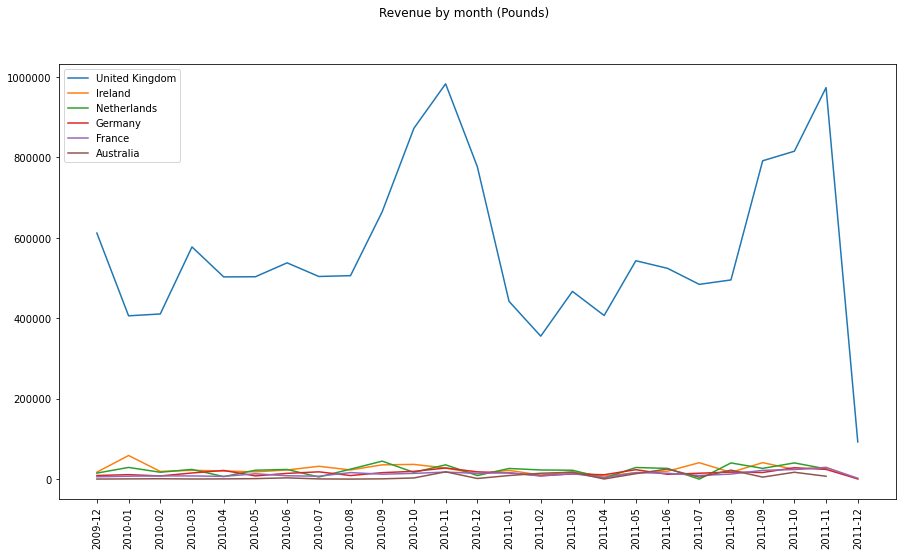

In [177]:
# Plot time-series for all six countries on same graph to illustrate reliance on UK

fig, ax = plt.subplots(figsize = (15, 8))
fig.suptitle('Revenue by month (Pounds)')
ax.ticklabel_format(axis = 'y', style = 'plain')
ax.plot(df_uk.groupby('month_year')['Subtotal'].sum(), label = 'United Kingdom')
ax.plot(df_ire.groupby('month_year')['Subtotal'].sum(), label = 'Ireland')
ax.plot(df_ned.groupby('month_year')['Subtotal'].sum(), label = 'Netherlands')
ax.plot(df_ger.groupby('month_year')['Subtotal'].sum(), label = 'Germany')
ax.plot(df_fra.groupby('month_year')['Subtotal'].sum(), label = 'France')
ax.plot(df_aus.groupby('month_year')['Subtotal'].sum(), label = 'Australia')
plt.legend()
plt.xticks(rotation = 90)
plt.show()

A more powerful demonstration of how much the company currently relies on United Kingdom customers for survival.

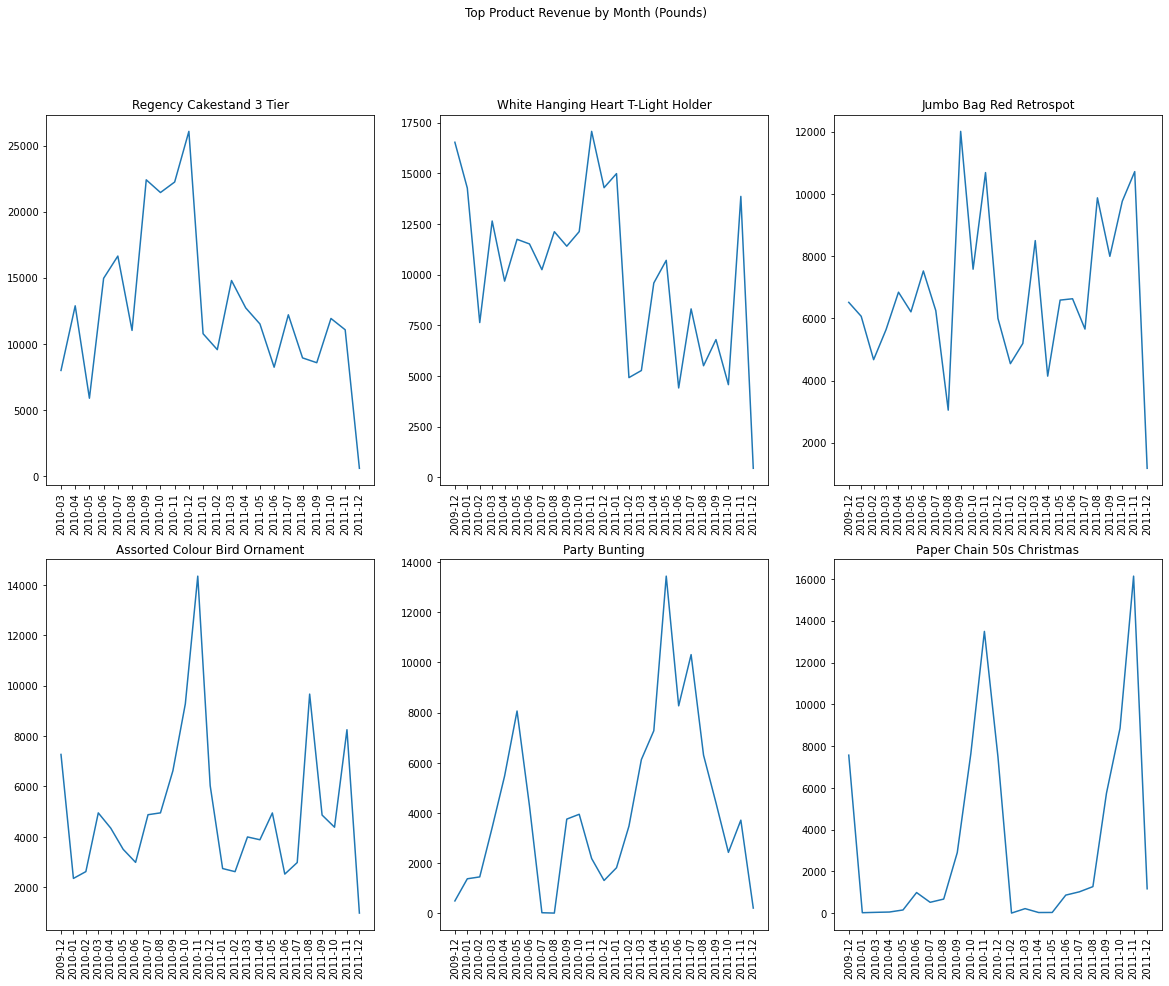

In [178]:
# Plot time-series for products

fig, ax = plt.subplots(2, 3, figsize = (20, 15))
fig.suptitle('Top Product Revenue by Month (Pounds)')
ax[0,0].plot(df[df['StockCode'] == '22423'].groupby('month_year')['Subtotal'].sum())
ax[0,0].title.set_text('Regency Cakestand 3 Tier')
ax[0,1].plot(df[df['StockCode'] == '85123A'].groupby('month_year')['Subtotal'].sum())
ax[0,1].title.set_text('White Hanging Heart T-Light Holder')
ax[0,2].plot(df[df['StockCode'] == '85099B'].groupby('month_year')['Subtotal'].sum())
ax[0,2].title.set_text('Jumbo Bag Red Retrospot')
ax[1,0].plot(df[df['StockCode'] == '84879'].groupby('month_year')['Subtotal'].sum())
ax[1,0].title.set_text('Assorted Colour Bird Ornament')
ax[1,1].plot(df[df['StockCode'] == '47566'].groupby('month_year')['Subtotal'].sum())
ax[1,1].title.set_text('Party Bunting')
ax[1,2].plot(df[df['StockCode'] == '22086'].groupby('month_year')['Subtotal'].sum())
ax[1,2].title.set_text('Paper Chain 50s Christmas')
plt.xticks(rotation = 90)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
plt.show()

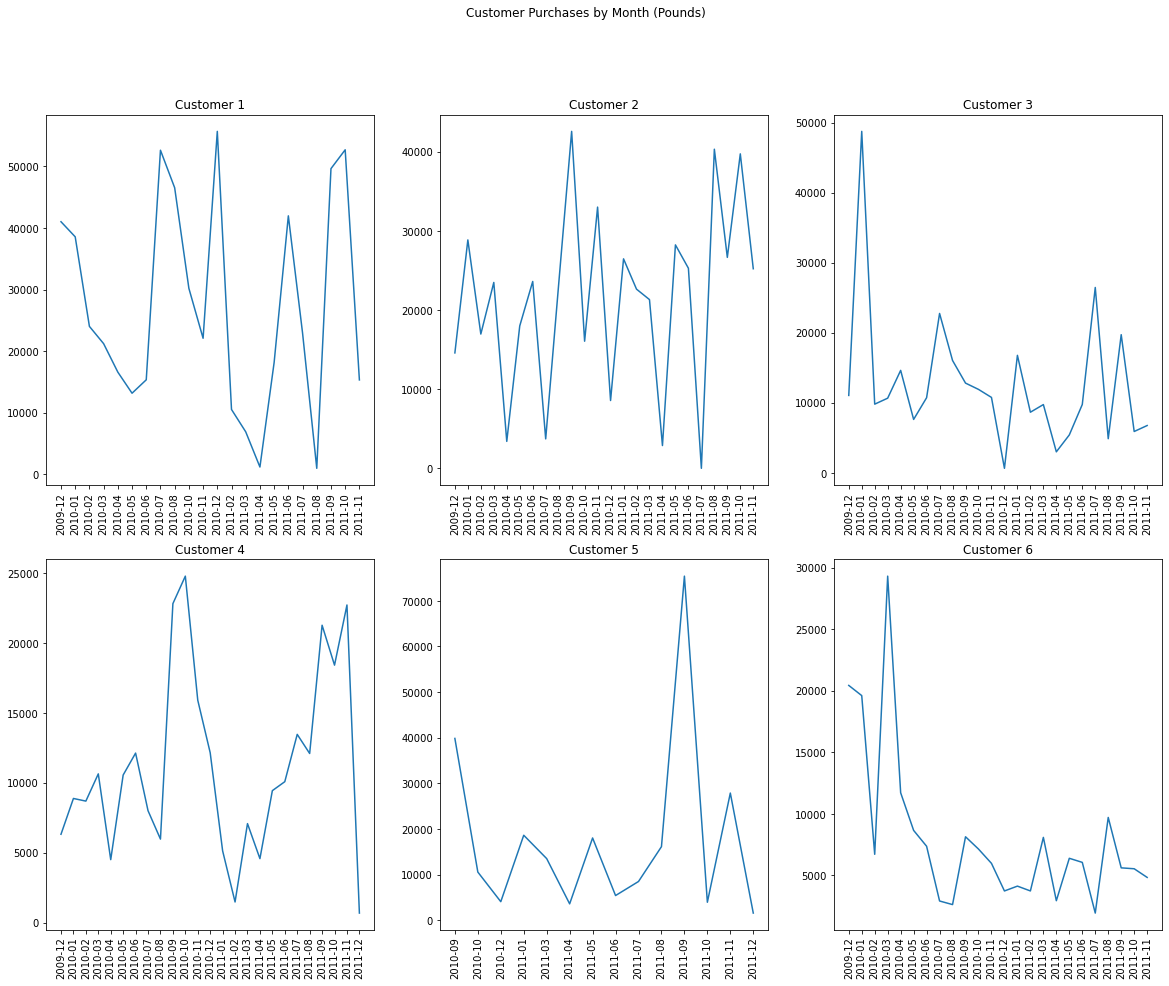

In [179]:
# Time-series of top customers 

fig, ax = plt.subplots(2, 3, figsize = (20, 15))
fig.suptitle('Customer Purchases by Month (Pounds)')
ax[0,0].plot(df[df['Customer ID'] == 18102].groupby('month_year')['Subtotal'].sum())
ax[0,0].title.set_text('Customer 1')
ax[0,1].plot(df[df['Customer ID'] == 14646].groupby('month_year')['Subtotal'].sum())
ax[0,1].title.set_text('Customer 2')
ax[0,2].plot(df[df['Customer ID'] == 14156].groupby('month_year')['Subtotal'].sum())
ax[0,2].title.set_text('Customer 3')
ax[1,0].plot(df[df['Customer ID'] == 14911].groupby('month_year')['Subtotal'].sum())
ax[1,0].title.set_text('Customer 4')
ax[1,1].plot(df[df['Customer ID'] == 17450].groupby('month_year')['Subtotal'].sum())
ax[1,1].title.set_text('Customer 5')
ax[1,2].plot(df[df['Customer ID'] == 13694].groupby('month_year')['Subtotal'].sum())
ax[1,2].title.set_text('Customer 6')
plt.xticks(rotation = 90)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
plt.show()

Looking at the top customers monthly spending, only Customer 2 looks like they are trending upward in purchases. Others have seasonal spikes or large one-time purchases that are not repeated, which causes them to trend downward.